In [14]:
import pandas as pd
import random
import numpy as np
import datetime
from datetime import datetime, timedelta
from scipy.stats.stats import pearsonr
from scipy import stats
import scipy
import matplotlib.pyplot as plt
import collections
from matplotlib.colors import LogNorm
import seaborn as sns
from scipy.optimize import curve_fit
from scipy.stats import ttest_ind


C:\Users\maggie\AppData\Local\Temp\ipykernel_8528\486033620.py:6: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


### plot tweet, user, vaccine doses time series:

check date range 2020-01-01 2022-05-29


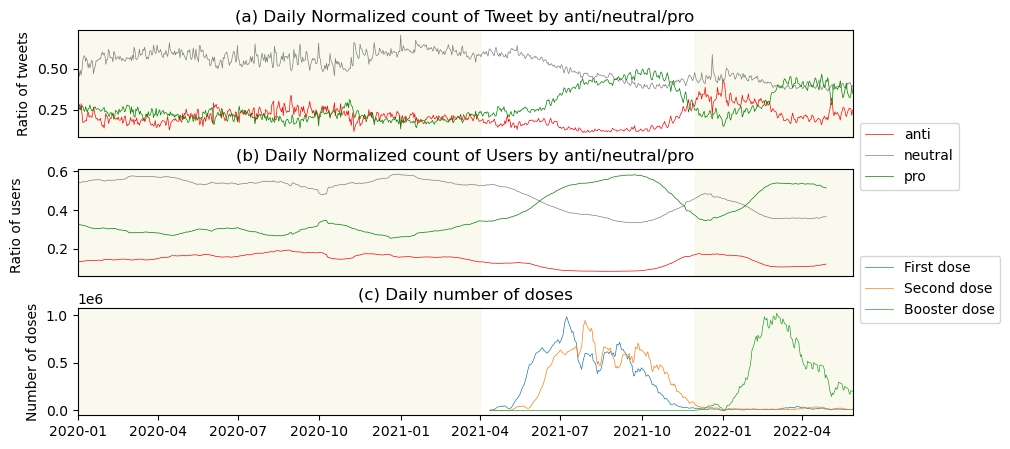

In [19]:
colors=['red','grey','green','black']
linestyle=['solid','solid','solid','dashed']
label=['anti','neutral','pro','total']


tweet_ts=pd.read_csv(r'C:\Maggie\Research Progress\Vaccine_tweet\paper_1_vaccine community\Sample_data\time_series\tweet_class_total_timeseries.txt',index_col=0)
tweet_ts.index=[datetime.strptime(t,"%Y-%m-%d").date() for t in tweet_ts.index]
tweet_ts

fig=plt.figure(figsize=(10,5))
plt.subplots_adjust(hspace=0.5)
start=0
end=879

plt.subplots_adjust(hspace=0.5)

classes=['anti','neutral','pro']


print("check date range",list(tweet_ts.index)[start],list(tweet_ts.index)[end])

ax=fig.add_subplot(3,1,1)
tweet_ts_nor=tweet_ts.copy()
temp_df=tweet_ts.iloc[start:end,:]
for c in range(3):
    plt.plot(temp_df.index,[temp_df.iloc[i,c]/temp_df.iloc[i,3] if temp_df.iloc[i,3]>0 else 0 for i in range(len(temp_df))],color=colors[c],linestyle=linestyle[c],label=label[c],linewidth=0.5)
    #plt.legend()
    tweet_ts_nor.iloc[start:end,c]=[temp_df.iloc[i,c]/temp_df.iloc[i,3] if temp_df.iloc[i,3]>0 else 0 for i in range(len(temp_df))]
ax.set_title('(a) Daily Normalized count of Tweet by anti/neutral/pro')
ax.set_ylabel('Ratio of tweets')
ax.set_xticks([])
plt.axvspan(datetime(2020,1,1),datetime(2021,4,1),color='beige',alpha=0.5)
plt.axvspan(datetime(2021,12,1),datetime(2022,5,28),color='beige',alpha=0.5)
ax.set_xlim([list(temp_df.index)[0],list(temp_df.index)[-1]])

tweet_user0=pd.read_csv(r"C:\Maggie\Research Progress\Vaccine_tweet\paper_1_vaccine community\Sample_data\time_series\date_u_class_summary30.txt",delimiter=" ",header=None)
tweet_user0

tweet_user=pd.DataFrame(columns=[0,1,2])
for r in tweet_user0.index:
    tweet_user.loc[tweet_user0.loc[r,0],tweet_user0.loc[r,1]]=tweet_user0.loc[r,2]
tweet_user.loc[:,'total']=np.sum(np.asarray(tweet_user.iloc[:,:3]),axis=1)
tweet_user

date_lst=list(tweet_user.index)
date_lst=[(datetime.strptime(t,"%Y-%m-%d")).date() for t in date_lst] #+timedelta(days=30)
#fig=plt.figure()
fig.subplots_adjust(hspace=0.3)
colors=['red','grey','green']

ax=fig.add_subplot(3,1,2)
for c in range(3):
    plt.plot(date_lst[:879-30],list(np.asarray(tweet_user.loc[:,c])/np.asarray(tweet_user.loc[:,'total']))[:879-30],color=colors[c],linewidth=0.5,label=classes[c])
#ax.set_xticklabels([])
plt.legend(bbox_to_anchor=(1,1.5))
plt.axvspan(datetime(2020,1,1),datetime(2021,4,1),color='beige',alpha=0.5)
plt.axvspan(datetime(2021,12,1),datetime(2022,5,28),color='beige',alpha=0.5)
ax.set_title('(b) Daily Normalized count of Users by anti/neutral/pro')
ax.set_ylabel('Ratio of users \n')
ax.set_xlim([list(temp_df.index)[0],list(temp_df.index)[-1]])
ax.set_xticks([])

#'''
ax=fig.add_subplot(3,1,3)
vaccine_ct=pd.read_csv(r"C:\Maggie\Research Progress\Vaccine_tweet\paper_1_vaccine community\Sample_data\summary_by_date.csv")
vaccine_ct=pd.read_csv(r"C:\Maggie\Research Progress\Vaccine_tweet\paper_1_vaccine community\Sample_data\summary_by_date.csv",index_col=0)
date_lst2=[datetime.strptime(d,"%Y-%m-%d").date() for d in vaccine_ct.index]
y=np.asarray(vaccine_ct["count_first_shot_general_wo_deceased"])
#y=[sum(y[:i]) for i in range(len(y))]
y=[np.average(y[max(0,i-3):min(len(y),i+3)]) for i in range(len(y))]
ax.plot(date_lst2,y,linewidth=0.5,label='First dose')
y=np.asarray(vaccine_ct["count_second_shot_general_wo_deceased"])
#y=[sum(y[:i]) for i in range(len(y))]
y=[np.average(y[max(0,i-3):min(len(y),i+3)]) for i in range(len(y))]
ax.plot(date_lst2,y,linewidth=0.5,label='Second dose')
y=np.asarray(vaccine_ct["count_third_shot_general_wo_deceased"])
#y=[sum(y[:i]) for i in range(len(y))]
y=[np.average(y[max(0,i-3):min(len(y),i+3)]) for i in range(len(y))]
ax.plot(date_lst2,y,linewidth=0.5,label='Booster dose')
ax.set_xlim([list(temp_df.index)[0],list(temp_df.index)[-1]])
plt.legend(bbox_to_anchor=(1,0.8))
ax.set_title('(c) Daily number of doses')
ax.set_ylabel('Number of doses')
ax.set_xlim([list(temp_df.index)[0],list(temp_df.index)[-1]])
plt.axvspan(datetime(2020,1,1),datetime(2021,4,1),color='beige',alpha=0.5)
plt.axvspan(datetime(2021,12,1),datetime(2022,5,28),color='beige',alpha=0.5)
#'''


In [344]:

new_data=tweet_user
new_data.loc[:,'ratio_0']=np.asarray(new_data.loc[:,0])/np.asarray(new_data.loc[:,'total'])
new_data.loc[:,'ratio_1']=np.asarray(new_data.loc[:,1])/np.asarray(new_data.loc[:,'total'])
new_data.loc[:,'ratio_2']=np.asarray(new_data.loc[:,2])/np.asarray(new_data.loc[:,'total'])

for i in vaccine_ct.index:
    #i0=datetime.strptime(i,"%Y-%m-%d").date()
    i0=i
    new_data.loc[i0,'first']=vaccine_ct.loc[i,"count_first_shot_general_wo_deceased"]
    new_data.loc[i0,'second']=vaccine_ct.loc[i,"count_second_shot_general_wo_deceased"]
    new_data.loc[i0,'third']=vaccine_ct.loc[i,"count_third_shot_general_wo_deceased"]
new_data=new_data.fillna(0)
new_data.loc[:,'vaccine_total']=np.sum(new_data.iloc[:,4:7],axis=1)
print(new_data)


t=1
start=365+3*30+12
end=365+11*30

for t in range(-20,20):
    #ratio of tweets
    x=list(new_data.iloc[start+t:end+t,7])
    #number of vaccination
    y=np.asarray(new_data.iloc[start:end,10])
    
    x2=list(new_data.iloc[start+t:end+t,9])
    #number of vaccination
    y2=np.asarray(new_data.iloc[start:end,10])
    
    print(t,pearsonr(x,y)[0],pearsonr(x2,y2)[0])
    

               0      1      2  total  first  second  third   ratio_0  \
2020-01-01  4116  16860  10201  31177    0.0     0.0    0.0  0.132020   
2020-01-02  4320  17690  10607  32617    0.0     0.0    0.0  0.132446   
2020-01-03  4474  18182  10873  33529    0.0     0.0    0.0  0.133437   
2020-01-04  4595  18605  11078  34278    0.0     0.0    0.0  0.134051   
2020-01-05  4704  18926  11286  34916    0.0     0.0    0.0  0.134723   
...          ...    ...    ...    ...    ...     ...    ...       ...   
2023-07-26     0      0      0      0   98.0    96.0  395.0  0.000000   
2023-07-27     0      0      0      0  106.0   105.0  294.0  0.000000   
2023-07-28     0      0      0      0  178.0   180.0  485.0  0.000000   
2023-07-29     0      0      0      0  152.0   123.0  417.0  0.000000   
2023-07-30     0      0      0      0   41.0    34.0   85.0  0.000000   

             ratio_1   ratio_2  vaccine_total  
2020-01-01  0.540783  0.327196            0.0  
2020-01-02  0.542355  0.325

### opinion transition matrix

C:\Users\maggie\AppData\Local\Temp\ipykernel_9948\2945352093.py:7: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  user_transfer=pd.read_csv(r"C:\Maggie\Research Progress\Vaccine_tweet\Sample_data\3_phases\u_com_class_trans_adjust_2.txt",delimiter=" ",header=None,index_col=0)
C:\Users\maggie\AppData\Local\Temp\ipykernel_9948\2945352093.py:31: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  user_transfer=pd.read_csv(r"C:\Maggie\Research Progress\Vaccine_tweet\Sample_data\3_phases\u_com_class_trans_adjust_2.txt",delimiter=" ",header=None,index_col=0)


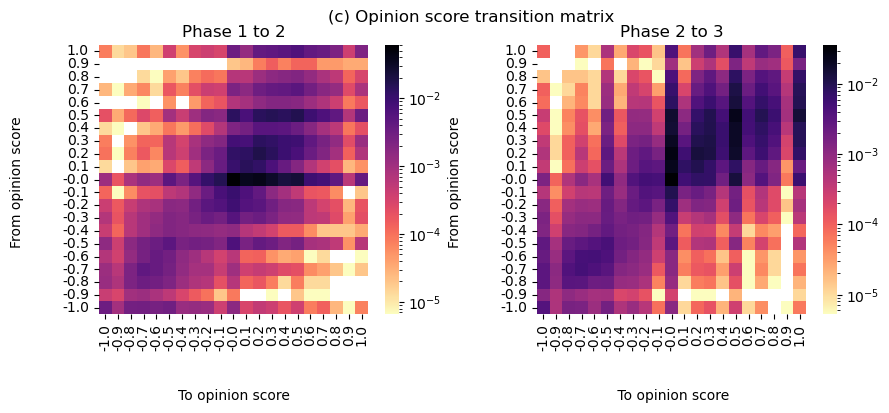

In [426]:
fig=plt.figure(figsize=(10,3.5))
plt.suptitle("(c) Opinion score transition matrix \n\n")
plt.subplots_adjust(wspace=0.3)
plt.subplots_adjust(hspace=0.3)

# p1 to p2
user_transfer=pd.read_csv(r"C:\Maggie\Research Progress\Vaccine_tweet\Sample_data\3_phases\u_com_class_trans_adjust_2.txt",delimiter=" ",header=None,index_col=0)
user_transfer=user_transfer.loc[(user_transfer[7]>1) & (user_transfer[8]>1)]
#user_transfer=user_transfer.loc[(np.abs(user_transfer[10])<1) & (np.abs(user_transfer[11])<1)]
user_transfer


transfer_matrix=pd.DataFrame(columns=np.round(np.arange(-1,1.1,0.1),1),index=np.round(np.arange(-1,1.1,0.1),1))
transfer_matrix=transfer_matrix.fillna(0)

for i in np.round(np.arange(-1,1.1,0.1),1):
    for j in np.round(np.arange(-1,1.1,0.1),1):
        transfer_matrix.loc[i,j]=len(user_transfer.loc[(user_transfer[10]==i) & (user_transfer[11]==j)])/len(user_transfer)
transfer_matrix

ax=fig.add_subplot(1,2,1)
ax=sns.heatmap(transfer_matrix.iloc[:,:],cmap="magma_r",norm=LogNorm(), xticklabels=True, yticklabels=True) #, norm=LogNorm()
plt.ylabel('From opinion score \n\n')
plt.xlabel('\n\nTo opinion score')
ax.set_title('Phase 1 to 2')
ax.invert_yaxis()


# p2 to p3

user_transfer=pd.read_csv(r"C:\Maggie\Research Progress\Vaccine_tweet\Sample_data\3_phases\u_com_class_trans_adjust_2.txt",delimiter=" ",header=None,index_col=0)
user_transfer=user_transfer.loc[(np.abs(user_transfer[8])>1) & (np.abs(user_transfer[9])>1)]
#user_transfer=user_transfer.loc[(np.abs(user_transfer[11])<1) & (np.abs(user_transfer[12])<1)]
user_transfer

transfer_matrix=pd.DataFrame(columns=np.round(np.arange(-1,1.1,0.1),1),index=np.round(np.arange(-1,1.1,0.1),1))
transfer_matrix=transfer_matrix.fillna(0)

for i in np.round(np.arange(-1,1.1,0.1),1):
    for j in np.round(np.arange(-1,1.1,0.1),1):
        transfer_matrix.loc[i,j]=len(user_transfer.loc[(user_transfer[11]==i) & (user_transfer[12]==j)])/len(user_transfer)
ax=fig.add_subplot(1,2,2)
ax=sns.heatmap(transfer_matrix.iloc[:,:],cmap="magma_r",norm=LogNorm(), xticklabels=True, yticklabels=True) #, norm=LogNorm()
plt.ylabel('From opinion score \n\n')
plt.xlabel('\n\n To opinion score')
ax.set_title('Phase 2 to 3')

ax.invert_yaxis()
               



C:\Users\maggie\AppData\Local\Temp\ipykernel_9948\1210955917.py:13: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  user_transfer=pd.read_csv(r"C:\Maggie\Research Progress\Vaccine_tweet\Sample_data\3_phases\u_com_class_trans_adjust_2.txt",delimiter=" ",header=None,index_col=0)


143275


C:\Users\maggie\AppData\Local\Temp\ipykernel_9948\1210955917.py:20: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  user_transfer=pd.read_csv(r"C:\Maggie\Research Progress\Vaccine_tweet\Sample_data\3_phases\u_com_class_trans_adjust_2.txt",delimiter=" ",header=None,index_col=0)


181729


C:\Users\maggie\AppData\Local\Temp\ipykernel_9948\1210955917.py:13: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  user_transfer=pd.read_csv(r"C:\Maggie\Research Progress\Vaccine_tweet\Sample_data\3_phases\u_com_class_trans_adjust_2.txt",delimiter=" ",header=None,index_col=0)


8996


C:\Users\maggie\AppData\Local\Temp\ipykernel_9948\1210955917.py:20: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  user_transfer=pd.read_csv(r"C:\Maggie\Research Progress\Vaccine_tweet\Sample_data\3_phases\u_com_class_trans_adjust_2.txt",delimiter=" ",header=None,index_col=0)


9711


C:\Users\maggie\AppData\Local\Temp\ipykernel_9948\1210955917.py:55: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  user_transfer=pd.read_csv(r"C:\Maggie\Research Progress\Vaccine_tweet\Sample_data\3_phases\u_com_class_trans_adjust_2.txt",delimiter=" ",header=None,index_col=0)


37322


C:\Users\maggie\AppData\Local\Temp\ipykernel_9948\1210955917.py:63: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  user_transfer=pd.read_csv(r"C:\Maggie\Research Progress\Vaccine_tweet\Sample_data\3_phases\u_com_class_trans_adjust_2.txt",delimiter=" ",header=None,index_col=0)


52393


C:\Users\maggie\AppData\Local\Temp\ipykernel_9948\1210955917.py:55: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  user_transfer=pd.read_csv(r"C:\Maggie\Research Progress\Vaccine_tweet\Sample_data\3_phases\u_com_class_trans_adjust_2.txt",delimiter=" ",header=None,index_col=0)


45466


C:\Users\maggie\AppData\Local\Temp\ipykernel_9948\1210955917.py:63: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  user_transfer=pd.read_csv(r"C:\Maggie\Research Progress\Vaccine_tweet\Sample_data\3_phases\u_com_class_trans_adjust_2.txt",delimiter=" ",header=None,index_col=0)


61244


C:\Users\maggie\AppData\Local\Temp\ipykernel_9948\1210955917.py:55: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  user_transfer=pd.read_csv(r"C:\Maggie\Research Progress\Vaccine_tweet\Sample_data\3_phases\u_com_class_trans_adjust_2.txt",delimiter=" ",header=None,index_col=0)


23006


C:\Users\maggie\AppData\Local\Temp\ipykernel_9948\1210955917.py:63: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  user_transfer=pd.read_csv(r"C:\Maggie\Research Progress\Vaccine_tweet\Sample_data\3_phases\u_com_class_trans_adjust_2.txt",delimiter=" ",header=None,index_col=0)


27643


C:\Users\maggie\AppData\Local\Temp\ipykernel_9948\1210955917.py:55: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  user_transfer=pd.read_csv(r"C:\Maggie\Research Progress\Vaccine_tweet\Sample_data\3_phases\u_com_class_trans_adjust_2.txt",delimiter=" ",header=None,index_col=0)


12775


C:\Users\maggie\AppData\Local\Temp\ipykernel_9948\1210955917.py:63: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  user_transfer=pd.read_csv(r"C:\Maggie\Research Progress\Vaccine_tweet\Sample_data\3_phases\u_com_class_trans_adjust_2.txt",delimiter=" ",header=None,index_col=0)


14371


C:\Users\maggie\AppData\Local\Temp\ipykernel_9948\1210955917.py:55: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  user_transfer=pd.read_csv(r"C:\Maggie\Research Progress\Vaccine_tweet\Sample_data\3_phases\u_com_class_trans_adjust_2.txt",delimiter=" ",header=None,index_col=0)


33702


C:\Users\maggie\AppData\Local\Temp\ipykernel_9948\1210955917.py:63: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  user_transfer=pd.read_csv(r"C:\Maggie\Research Progress\Vaccine_tweet\Sample_data\3_phases\u_com_class_trans_adjust_2.txt",delimiter=" ",header=None,index_col=0)


35789


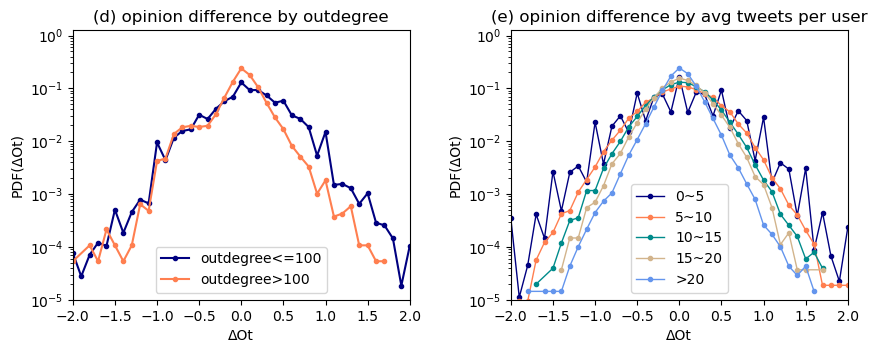

In [480]:
# distribution of opinion change differentiated by outdegree

fig=plt.figure(figsize=(10,3.5))
plt.subplots_adjust(wspace=0.3)
plt.subplots_adjust(hspace=0.3)


ax=fig.add_subplot(1,2,1)
colors=['lightgrey','navy','coral', 'darkcyan', 'tan', 'cornflowerblue', 'crimson']
outdegree_range=[0,100,10000000000]
labels=["outdegree<=100","outdegree>100"]
for o in range(2):
    user_transfer=pd.read_csv(r"C:\Maggie\Research Progress\Vaccine_tweet\Sample_data\3_phases\u_com_class_trans_adjust_2.txt",delimiter=" ",header=None,index_col=0)
    user_transfer=user_transfer.loc[(user_transfer[7]>1) & (user_transfer[8]>1)]
    temp=user_transfer.loc[(user_transfer[13]+user_transfer[14]>=outdegree_range[o]*2) & (user_transfer[13]+user_transfer[14]<outdegree_range[o+1]*2)]
    print(len(temp))
    #y0=list(np.round(np.abs(np.asarray(temp[11])-np.asarray(temp[10])),1))
    y0=list(np.round(np.asarray(temp[11])-np.asarray(temp[10]),1))
    
    user_transfer=pd.read_csv(r"C:\Maggie\Research Progress\Vaccine_tweet\Sample_data\3_phases\u_com_class_trans_adjust_2.txt",delimiter=" ",header=None,index_col=0)
    user_transfer=user_transfer.loc[(user_transfer[8]>1) & (user_transfer[9]>1)]
    temp=user_transfer.loc[(user_transfer[14]+user_transfer[15]>=outdegree_range[o]*2) & (user_transfer[14]+user_transfer[15]<outdegree_range[o+1]*2)]
    print(len(temp))
    y0+=list(np.round(np.asarray(temp[11])-np.asarray(temp[10]),1))
       
    
    yy=collections.Counter(y0)
    yy=dict(sorted(yy.items()))
    y=list(yy.values())

    #std_lst=np.sqrt([(sum(y[i:])/sum(y))*(1-sum(y[i:])/sum(y))/sum(y) for i in range(len(y))])
    #y=[sum(y[i:])/sum(y) for i in range(len(y))]
    y=[y[i]/sum(y) for i in range(len(y))]
    #plt.errorbar(yy.keys(),y,yerr=std_lst,label="",color="black")

    plt.plot(yy.keys(),y,marker='o',color=colors[o+1],label=labels[o],markersize=3)

    plt.xlim([-2,2])
    plt.yscale('log')
    plt.ylim([10**(-5),10**0.1])
    plt.ylabel('PDF(ΔOt)')
    plt.xlabel('ΔOt')
ax.set_title("(d) opinion difference by outdegree")
plt.legend()


# distribution of opinion change differentiated by outdegree
ax=fig.add_subplot(1,2,2)

colors=['lightgrey','navy','coral', 'darkcyan', 'tan', 'cornflowerblue', 'crimson']

outdegree_range=[0,5,10,15,20,100000]
labels=["0~5","5~10","10~15","15~20",">20"]
for o in range(5):
    user_transfer=pd.read_csv(r"C:\Maggie\Research Progress\Vaccine_tweet\Sample_data\3_phases\u_com_class_trans_adjust_2.txt",delimiter=" ",header=None,index_col=0)
    user_transfer=user_transfer.loc[(user_transfer[7]>1) & (user_transfer[8]>1)]
    y0=list(np.round(np.abs(np.asarray(temp[11])-np.asarray(temp[10])),1))
    temp=user_transfer.loc[(user_transfer[7]+user_transfer[8]>=outdegree_range[o]*2) & (user_transfer[7]+user_transfer[8]<outdegree_range[o+1]*2)]
    print(len(temp))
    #y0=list(np.round(np.abs(np.asarray(temp[11])-np.asarray(temp[10])),1))
    y0=list(np.round(np.asarray(temp[11])-np.asarray(temp[10]),1))
    
    user_transfer=pd.read_csv(r"C:\Maggie\Research Progress\Vaccine_tweet\Sample_data\3_phases\u_com_class_trans_adjust_2.txt",delimiter=" ",header=None,index_col=0)
    user_transfer=user_transfer.loc[(user_transfer[8]>1) & (user_transfer[9]>1)]
    temp=user_transfer.loc[(user_transfer[8]+user_transfer[9]>=outdegree_range[o]*2) & (user_transfer[8]+user_transfer[9]<outdegree_range[o+1]*2)]
    print(len(temp))
    #y0+=list(np.round(np.abs(np.asarray(temp[12])-np.asarray(temp[11])),1))
    y0+=list(np.round(np.asarray(temp[12])-np.asarray(temp[11]),1))
    
    yy=collections.Counter(y0)
    yy=dict(sorted(yy.items()))
    y=list(yy.values())

    #std_lst=np.sqrt([(sum(y[i:])/sum(y))*(1-sum(y[i:])/sum(y))/sum(y) for i in range(len(y))])
    #y=[sum(y[i:])/sum(y) for i in range(len(y))]
    y=[y[i]/sum(y) for i in range(len(y))]
    #plt.errorbar(yy.keys(),y,yerr=std_lst,label="",color="black")

    #plt.scatter(yy.keys(),y,label=labels[o],marker=o+3,color="black") #,color=colors[o],marker='o'
    plt.plot(yy.keys(),y,label=labels[o],color=colors[o+1],marker='o',linewidth=1,markersize=3) #,color=colors[o],marker='o'

    plt.xlim([-2,2])
    plt.yscale('log')
    plt.ylim([10**(-5),10**0.1])
    plt.ylabel('PDF(ΔOt)')
    plt.xlabel('ΔOt')
ax.set_title("(e) opinion difference by avg tweets per user")



plt.legend()

C:\Users\maggie\AppData\Local\Temp\ipykernel_9948\475559215.py:9: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  user_transfer=pd.read_csv(r"C:\Maggie\Research Progress\Vaccine_tweet\Sample_data\3_phases\u_com_class_trans_adjust_2.txt",delimiter=" ",header=None,index_col=0)


37322


C:\Users\maggie\AppData\Local\Temp\ipykernel_9948\475559215.py:9: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  user_transfer=pd.read_csv(r"C:\Maggie\Research Progress\Vaccine_tweet\Sample_data\3_phases\u_com_class_trans_adjust_2.txt",delimiter=" ",header=None,index_col=0)


45466


C:\Users\maggie\AppData\Local\Temp\ipykernel_9948\475559215.py:9: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  user_transfer=pd.read_csv(r"C:\Maggie\Research Progress\Vaccine_tweet\Sample_data\3_phases\u_com_class_trans_adjust_2.txt",delimiter=" ",header=None,index_col=0)


23006


C:\Users\maggie\AppData\Local\Temp\ipykernel_9948\475559215.py:9: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  user_transfer=pd.read_csv(r"C:\Maggie\Research Progress\Vaccine_tweet\Sample_data\3_phases\u_com_class_trans_adjust_2.txt",delimiter=" ",header=None,index_col=0)


12775


C:\Users\maggie\AppData\Local\Temp\ipykernel_9948\475559215.py:9: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  user_transfer=pd.read_csv(r"C:\Maggie\Research Progress\Vaccine_tweet\Sample_data\3_phases\u_com_class_trans_adjust_2.txt",delimiter=" ",header=None,index_col=0)


33702


C:\Users\maggie\AppData\Local\Temp\ipykernel_9948\475559215.py:34: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  user_transfer=pd.read_csv(r"C:\Maggie\Research Progress\Vaccine_tweet\Sample_data\3_phases\u_com_class_trans_adjust_2.txt",delimiter=" ",header=None,index_col=0)


52393


C:\Users\maggie\AppData\Local\Temp\ipykernel_9948\475559215.py:34: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  user_transfer=pd.read_csv(r"C:\Maggie\Research Progress\Vaccine_tweet\Sample_data\3_phases\u_com_class_trans_adjust_2.txt",delimiter=" ",header=None,index_col=0)


61244


C:\Users\maggie\AppData\Local\Temp\ipykernel_9948\475559215.py:34: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  user_transfer=pd.read_csv(r"C:\Maggie\Research Progress\Vaccine_tweet\Sample_data\3_phases\u_com_class_trans_adjust_2.txt",delimiter=" ",header=None,index_col=0)


27643


C:\Users\maggie\AppData\Local\Temp\ipykernel_9948\475559215.py:34: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  user_transfer=pd.read_csv(r"C:\Maggie\Research Progress\Vaccine_tweet\Sample_data\3_phases\u_com_class_trans_adjust_2.txt",delimiter=" ",header=None,index_col=0)


14371


C:\Users\maggie\AppData\Local\Temp\ipykernel_9948\475559215.py:34: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  user_transfer=pd.read_csv(r"C:\Maggie\Research Progress\Vaccine_tweet\Sample_data\3_phases\u_com_class_trans_adjust_2.txt",delimiter=" ",header=None,index_col=0)


35789


Text(0.5, 1.0, 'Opinion difference by avg tweets per user')

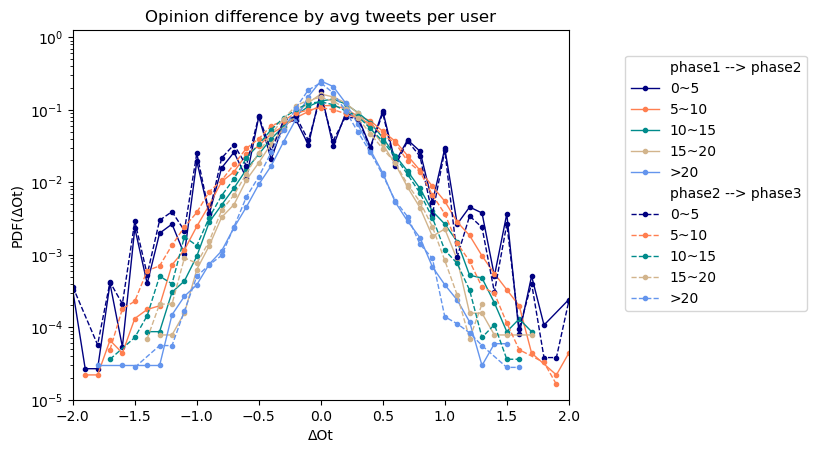

In [485]:
# distribution of opinion change differentiated by outdegree

colors=['lightgrey','navy','coral', 'darkcyan', 'tan', 'cornflowerblue', 'crimson']

outdegree_range=[0,5,10,15,20,100000]
labels=["0~5","5~10","10~15","15~20",">20"]
plt.plot([0],[0],color='white',label='phase1 --> phase2')
for o in range(5):
    user_transfer=pd.read_csv(r"C:\Maggie\Research Progress\Vaccine_tweet\Sample_data\3_phases\u_com_class_trans_adjust_2.txt",delimiter=" ",header=None,index_col=0)
    user_transfer=user_transfer.loc[(user_transfer[7]>1) & (user_transfer[8]>1)]
    #y0=list(np.round(np.abs(np.asarray(temp[11])-np.asarray(temp[10])),1))
    temp=user_transfer.loc[(user_transfer[7]+user_transfer[8]>=outdegree_range[o]*2) & (user_transfer[7]+user_transfer[8]<outdegree_range[o+1]*2)]
    print(len(temp))
    y0=list(np.round(np.asarray(temp[11])-np.asarray(temp[10]),1))
    
    yy=collections.Counter(y0)
    yy=dict(sorted(yy.items()))
    y=list(yy.values())

    #std_lst=np.sqrt([(sum(y[i:])/sum(y))*(1-sum(y[i:])/sum(y))/sum(y) for i in range(len(y))])
    #y=[sum(y[i:])/sum(y) for i in range(len(y))]
    y=[y[i]/sum(y) for i in range(len(y))]
    #plt.errorbar(yy.keys(),y,yerr=std_lst,label="",color="black")

    #plt.scatter(yy.keys(),y,label=labels[o],marker=o+3,color="black") #,color=colors[o],marker='o'
    plt.plot(yy.keys(),y,label=labels[o],color=colors[o+1],marker='o',markersize=3,linewidth=1) #,color=colors[o],marker='o'

    plt.xlim([-2,2])
    plt.yscale('log')
    plt.ylim([10**(-5),10**0.1])

plt.plot([0],[0],color='white',label='phase2 --> phase3')
for o in range(5):
    user_transfer=pd.read_csv(r"C:\Maggie\Research Progress\Vaccine_tweet\Sample_data\3_phases\u_com_class_trans_adjust_2.txt",delimiter=" ",header=None,index_col=0)
    user_transfer=user_transfer.loc[(user_transfer[8]>1) & (user_transfer[9]>1)]
    temp=user_transfer.loc[(user_transfer[8]+user_transfer[9]>=outdegree_range[o]*2) & (user_transfer[8]+user_transfer[9]<outdegree_range[o+1]*2)]
    print(len(temp))
    #y0=list(np.round(np.abs(np.asarray(temp[12])-np.asarray(temp[11])),1))
    y0=list(np.round(np.asarray(temp[12])-np.asarray(temp[11]),1))
    
    yy=collections.Counter(y0)
    yy=dict(sorted(yy.items()))
    y=list(yy.values())

    #std_lst=np.sqrt([(sum(y[i:])/sum(y))*(1-sum(y[i:])/sum(y))/sum(y) for i in range(len(y))])
    #y=[sum(y[i:])/sum(y) for i in range(len(y))]
    y=[y[i]/sum(y) for i in range(len(y))]
    #plt.errorbar(yy.keys(),y,yerr=std_lst,label="",color="black")

    #plt.scatter(yy.keys(),y,label=labels[o],marker=o+3,color="black") #,color=colors[o],marker='o'
    plt.plot(yy.keys(),y,label=labels[o],markersize=3,color=colors[o+1],marker='o',linewidth=1,linestyle='dashed') #,color=colors[o],marker='o'

    plt.xlim([-2,2])
    plt.yscale('log')
    plt.ylim([10**(-5),10**0.1])

plt.legend(bbox_to_anchor=(1.1,0.95))
plt.ylabel('PDF(ΔOt)')
plt.xlabel('ΔOt')
plt.title("Opinion difference by avg tweets per user")


In [445]:
user_transfer

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,,,,,,,,,,,,,,,
1000001516277673984,2706,3344,2102,0,0,0,5,17,18,-1.0,-0.9,-0.7,0,6,1
1000010425755320320,5339,14036,16389,1,1,1,123,503,93,0.2,0.2,0.3,233,304,54
100001484,0,14036,16389,0,2,1,0,3,2,0.0,0.7,0.0,0,15,0
1000015128723537920,4289,14036,16389,2,1,1,2,7,2,0.5,0.1,0.0,0,0,12
1000016393641775104,2706,3344,2102,0,0,0,3,29,3,-0.7,-0.6,-1.0,0,36,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999988553969950720,0,1551,23070,0,2,2,0,13,5,0.0,0.4,0.6,0,0,1
999989477031333888,0,14036,16389,0,1,1,0,14,2,0.0,-0.1,0.0,0,0,7
99999097,6162,4867,16389,1,1,1,5,9,3,-0.2,0.1,-0.3,0,1,1


C:\Users\maggie\AppData\Local\Temp\ipykernel_9948\3472222224.py:6: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  user_transfer=pd.read_csv(r"C:\Maggie\Research Progress\Vaccine_tweet\Sample_data\3_phases\u_com_class_trans_adjust_2.txt",delimiter=" ",header=None,index_col=0)


143275
                       1      2      3   4   5   6   7   8   9    10   11  \
0                                                                           
1000001516277673984  2706   3344   2102   0   0   0   5  17  18 -1.0 -0.9   
100001336            4289   1551      0   1   1   0   4  10   0  0.0  0.0   
1000015128723537920  4289  14036  16389   2   1   1   2   7   2  0.5  0.1   
1000016393641775104  2706   3344   2102   0   0   0   3  29   3 -0.7 -0.6   
1000018055185842176  4289   4867      0   2   1   0   9  45   0  0.0  0.3   
...                   ...    ...    ...  ..  ..  ..  ..  ..  ..  ...  ...   
999934819713757185   1893   7017  16389   1   1   9   5  15   0  0.2  0.3   
999936488123985921   4289  14036  16389   1   1   9   2  18   0  0.0  0.2   
999943608244424704   5339  14036  16389   2   1   1   2   5   1  0.5  0.4   
999957951652614145   4289  14036      0   1   1   0   3   2   0  0.3  0.0   
99999097             6162   4867  16389   1   1   1   5   9   3 -0.2 

C:\Users\maggie\AppData\Local\Temp\ipykernel_9948\3472222224.py:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  user_transfer=pd.read_csv(r"C:\Maggie\Research Progress\Vaccine_tweet\Sample_data\3_phases\u_com_class_trans_adjust_2.txt",delimiter=" ",header=None,index_col=0)


181729
                       1      2      3   4   5   6   7   8   9    10   11  \
0                                                                           
1000001516277673984  2706   3344   2102   0   0   0   5  17  18 -1.0 -0.9   
100001484               0  14036  16389   0   2   1   0   3   2  0.0  0.7   
1000015128723537920  4289  14036  16389   2   1   1   2   7   2  0.5  0.1   
1000016393641775104  2706   3344   2102   0   0   0   3  29   3 -0.7 -0.6   
1000024647872626690  5339  14036  16389   9   2   1   0   2   5  9.0  0.5   
...                   ...    ...    ...  ..  ..  ..  ..  ..  ..  ...  ...   
999988553969950720      0   1551  23070   0   2   2   0  13   5  0.0  0.4   
999989477031333888      0  14036  16389   0   1   1   0  14   2  0.0 -0.1   
99999097             6162   4867  16389   1   1   1   5   9   3 -0.2  0.1   
999996393598013442      0  25251  17852   0   0   2   0  47   3  0.0 -0.6   
999997581173313536    106  19890  16389   9   2   1   0   9   4  9.0 

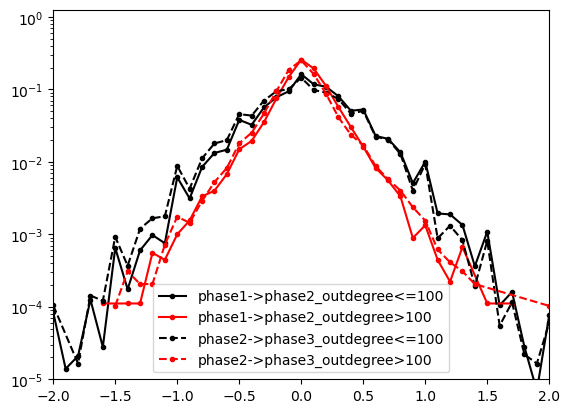

In [460]:
# distribution of opinion change differentiated by outdegree

#colors=['lightgrey','navy','coral', 'darkcyan', 'tan', 'cornflowerblue', 'crimson']
colors=['black','red']

user_transfer=pd.read_csv(r"C:\Maggie\Research Progress\Vaccine_tweet\Sample_data\3_phases\u_com_class_trans_adjust_2.txt",delimiter=" ",header=None,index_col=0)
user_transfer=user_transfer.loc[(user_transfer[7]>1) & (user_transfer[8]>1)]
user_transfer

outdegree_range=[0,100,10000000000]
labels=["phase1->phase2_outdegree<=100","phase1->phase2_outdegree>100"]
for o in range(2):
    temp=user_transfer.loc[(user_transfer[13]+user_transfer[14]>=outdegree_range[o]*2) & (user_transfer[13]+user_transfer[14]<outdegree_range[o+1]*2)]
    print(len(temp))
    print(temp)
    #y0=np.round(np.abs(np.asarray(temp[11])-np.asarray(temp[10])),1)
    y0=np.round(np.asarray(temp[11])-np.asarray(temp[10]),1)
    print(y0)
    yy=collections.Counter(y0)
    yy=dict(sorted(yy.items()))
    y=list(yy.values())
    print(yy)
    
    #std_lst=np.sqrt([(sum(y[i:])/sum(y))*(1-sum(y[i:])/sum(y))/sum(y) for i in range(len(y))])
    #y=[sum(y[i:])/sum(y) for i in range(len(y))]
    y=[y[i]/sum(y) for i in range(len(y))]
    print(y)

    #plt.errorbar(yy.keys(),y,yerr=std_lst,label="",color="black")

    plt.plot(yy.keys(),y,marker='o',markersize=3,color=colors[o],label=labels[o])

    plt.xlim([-2,2])
    plt.yscale('log')
    plt.ylim([10**(-5),10**0.1])
    print('--------------------------------------------------')
    
user_transfer=pd.read_csv(r"C:\Maggie\Research Progress\Vaccine_tweet\Sample_data\3_phases\u_com_class_trans_adjust_2.txt",delimiter=" ",header=None,index_col=0)
user_transfer=user_transfer.loc[(user_transfer[8]>1) & (user_transfer[9]>1)]
user_transfer

outdegree_range=[0,100,10000000000]
labels=["phase2->phase3_outdegree<=100","phase2->phase3_outdegree>100"]
for o in range(2):
    temp=user_transfer.loc[(user_transfer[14]+user_transfer[15]>=outdegree_range[o]*2) & (user_transfer[14]+user_transfer[15]<outdegree_range[o+1]*2)]
    print(len(temp))
    print(temp)
    #y0=np.round(np.abs(np.asarray(temp[12])-np.asarray(temp[11])),1)
    y0=np.round(np.asarray(temp[12])-np.asarray(temp[11]),1)
    
    print(y0)
    yy=collections.Counter(y0)
    yy=dict(sorted(yy.items()))
    y=list(yy.values())
    print(yy)
    

    #std_lst=np.sqrt([(sum(y[i:])/sum(y))*(1-sum(y[i:])/sum(y))/sum(y) for i in range(len(y))])
    #y=[sum(y[i:])/sum(y) for i in range(len(y))]
    y=[y[i]/sum(y) for i in range(len(y))]
    print(y)
    #plt.errorbar(yy.keys(),y,yerr=std_lst,label="",color="black")

    plt.plot(yy.keys(),y,marker='o',markersize=3,color=colors[o],linestyle='dashed',label=labels[o])

    plt.xlim([-2,2])
    #plt.yscale('log')
    plt.ylim([10**(-5),10**0.1])
    print('--------------------------------------------------')

plt.legend()

C:\Users\maggie\AppData\Local\Temp\ipykernel_9948\193046724.py:6: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  user_transfer=pd.read_csv(r"C:\Maggie\Research Progress\Vaccine_tweet\Sample_data\3_phases\u_com_class_trans_adjust_2.txt",delimiter=" ",header=None,index_col=0)


143275
                       1      2      3   4   5   6   7   8   9    10   11  \
0                                                                           
1000001516277673984  2706   3344   2102   0   0   0   5  17  18 -1.0 -0.9   
100001336            4289   1551      0   1   1   0   4  10   0  0.0  0.0   
1000015128723537920  4289  14036  16389   2   1   1   2   7   2  0.5  0.1   
1000016393641775104  2706   3344   2102   0   0   0   3  29   3 -0.7 -0.6   
1000018055185842176  4289   4867      0   2   1   0   9  45   0  0.0  0.3   
...                   ...    ...    ...  ..  ..  ..  ..  ..  ..  ...  ...   
999934819713757185   1893   7017  16389   1   1   9   5  15   0  0.2  0.3   
999936488123985921   4289  14036  16389   1   1   9   2  18   0  0.0  0.2   
999943608244424704   5339  14036  16389   2   1   1   2   5   1  0.5  0.4   
999957951652614145   4289  14036      0   1   1   0   3   2   0  0.3  0.0   
99999097             6162   4867  16389   1   1   1   5   9   3 -0.2 

C:\Users\maggie\AppData\Local\Temp\ipykernel_9948\193046724.py:38: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  user_transfer=pd.read_csv(r"C:\Maggie\Research Progress\Vaccine_tweet\Sample_data\3_phases\u_com_class_trans_adjust_2.txt",delimiter=" ",header=None,index_col=0)


181729
                       1      2      3   4   5   6   7   8   9    10   11  \
0                                                                           
1000001516277673984  2706   3344   2102   0   0   0   5  17  18 -1.0 -0.9   
100001484               0  14036  16389   0   2   1   0   3   2  0.0  0.7   
1000015128723537920  4289  14036  16389   2   1   1   2   7   2  0.5  0.1   
1000016393641775104  2706   3344   2102   0   0   0   3  29   3 -0.7 -0.6   
1000024647872626690  5339  14036  16389   9   2   1   0   2   5  9.0  0.5   
...                   ...    ...    ...  ..  ..  ..  ..  ..  ..  ...  ...   
999988553969950720      0   1551  23070   0   2   2   0  13   5  0.0  0.4   
999989477031333888      0  14036  16389   0   1   1   0  14   2  0.0 -0.1   
99999097             6162   4867  16389   1   1   1   5   9   3 -0.2  0.1   
999996393598013442      0  25251  17852   0   0   2   0  47   3  0.0 -0.6   
999997581173313536    106  19890  16389   9   2   1   0   9   4  9.0 

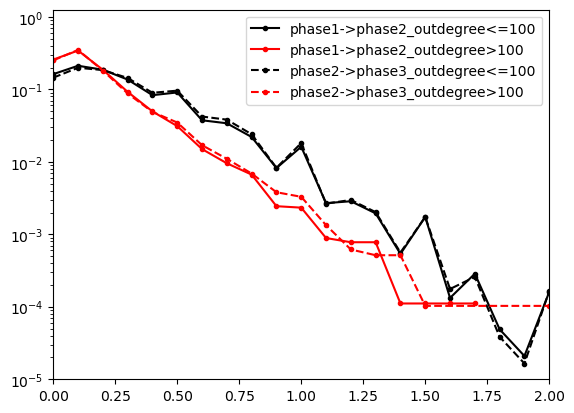

In [469]:
# distribution of opinion change differentiated by outdegree

#colors=['lightgrey','navy','coral', 'darkcyan', 'tan', 'cornflowerblue', 'crimson']
colors=['black','red']

user_transfer=pd.read_csv(r"C:\Maggie\Research Progress\Vaccine_tweet\Sample_data\3_phases\u_com_class_trans_adjust_2.txt",delimiter=" ",header=None,index_col=0)
user_transfer=user_transfer.loc[(user_transfer[7]>1) & (user_transfer[8]>1)]
user_transfer

outdegree_range=[0,100,10000000000]
labels=["phase1->phase2_outdegree<=100","phase1->phase2_outdegree>100"]
for o in range(2):
    temp=user_transfer.loc[(user_transfer[13]+user_transfer[14]>=outdegree_range[o]*2) & (user_transfer[13]+user_transfer[14]<outdegree_range[o+1]*2)]
    print(len(temp))
    print(temp)
    y0=np.round(np.abs(np.asarray(temp[11])-np.asarray(temp[10])),1)
    #y0=np.round(np.asarray(temp[11])-np.asarray(temp[10]),1)
    print(y0)
    yy=collections.Counter(y0)
    yy=dict(sorted(yy.items()))
    y=list(yy.values())
    print(yy)
    
    #std_lst=np.sqrt([(sum(y[i:])/sum(y))*(1-sum(y[i:])/sum(y))/sum(y) for i in range(len(y))])
    #y=[sum(y[i:])/sum(y) for i in range(len(y))]
    y=[y[i]/sum(y) for i in range(len(y))]
    print(y)

    #plt.errorbar(yy.keys(),y,yerr=std_lst,label="",color="black")

    plt.plot(yy.keys(),y,marker='o',markersize=3,color=colors[o],label=labels[o])

    plt.xlim([-2,2])
    plt.yscale('log')
    plt.ylim([10**(-5),10**0.1])
    print('--------------------------------------------------')
    
user_transfer=pd.read_csv(r"C:\Maggie\Research Progress\Vaccine_tweet\Sample_data\3_phases\u_com_class_trans_adjust_2.txt",delimiter=" ",header=None,index_col=0)
user_transfer=user_transfer.loc[(user_transfer[8]>1) & (user_transfer[9]>1)]
user_transfer

outdegree_range=[0,100,10000000000]
labels=["phase2->phase3_outdegree<=100","phase2->phase3_outdegree>100"]
for o in range(2):
    temp=user_transfer.loc[(user_transfer[14]+user_transfer[15]>=outdegree_range[o]*2) & (user_transfer[14]+user_transfer[15]<outdegree_range[o+1]*2)]
    print(len(temp))
    print(temp)
    y0=np.round(np.abs(np.asarray(temp[12])-np.asarray(temp[11])),1)
    #y0=np.round(np.asarray(temp[12])-np.asarray(temp[11]),1)
    
    print(y0)
    yy=collections.Counter(y0)
    yy=dict(sorted(yy.items()))
    y=list(yy.values())
    print(yy)
    

    #std_lst=np.sqrt([(sum(y[i:])/sum(y))*(1-sum(y[i:])/sum(y))/sum(y) for i in range(len(y))])
    #y=[sum(y[i:])/sum(y) for i in range(len(y))]
    y=[y[i]/sum(y) for i in range(len(y))]
    print(y)
    #plt.errorbar(yy.keys(),y,yerr=std_lst,label="",color="black")

    plt.plot(yy.keys(),y,marker='o',markersize=3,color=colors[o],linestyle='dashed',label=labels[o])

    plt.xlim([0,2])
    #plt.yscale('log')
    plt.ylim([10**(-5),10**0.1])
    print('--------------------------------------------------')

plt.legend()

### Dynamic community: see Community_tracking notebook

### preferential connection to internal and external nodes:


In [493]:
d1="2020-01-01"
op_dif_shuf=pd.read_csv(r"C:\Maggie\Research Progress\Vaccine_tweet\Sample_data\daily_90\link_opinion_dff\link_opinion_"+d1_0+"_shuf.csv",delimiter=" |\t",header=None,index_col=0)
op_dif_shuf

C:\Users\maggie\AppData\Local\Temp\ipykernel_9948\1963466364.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  op_dif_shuf=pd.read_csv(r"C:\Maggie\Research Progress\Vaccine_tweet\Sample_data\daily_90\link_opinion_dff\link_opinion_"+d1_0+"_shuf.csv",delimiter=" |\t",header=None,index_col=0)


,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,,,,,,,,,,,,,,
2022-04-01,1,-0.6,-0.5,2638,13684,0.4,0.7,-0.1,-1.0,1.7,0.6,0.3,0.6,-0.4
2022-04-01,1,0.1,-0.1,13684,13684,0.0,-0.5,-0.1,0.6,-0.5,0.8,1.7,0.3,1.4
2022-04-01,1,0.1,0.0,13684,13684,-0.1,0.6,0.7,-0.1,0.0,-0.2,1.2,0.0,0.6
2022-04-01,1,0.1,0.1,13684,13684,0.0,0.0,0.7,-0.7,0.8,0.1,0.2,-0.8,0.5
2022-04-01,1,0.1,-0.1,13684,13684,0.0,0.6,0.1,0.1,-1.0,1.1,-0.4,0.0,-0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-01,1,0.0,0.0,3387,2638,-0.7,0.2,0.4,1.5,0.0,0.3,-0.6,0.1,-0.5
2022-04-01,1,0.0,-0.6,3387,13684,-0.4,0.5,0.6,0.5,-0.8,0.5,0.0,0.0,0.2
2022-04-01,1,0.0,-0.3,3387,13684,0.5,-0.4,0.6,0.2,-0.1,0.0,0.2,0.1,1.1


In [498]:
i=1
date_lst=list()
d1=datetime(2020,i,1)
y=2020
while d1<datetime(2022,3,1):
    d1=datetime(y,i,1)
    date_lst.append(d1.date())
    i+=1
    if i>12:
        y+=1
        i=1
date_lst=[datetime.strftime(t,"%Y-%m-%d") for t in date_lst]
date_lst

['2020-01-01',
 '2020-02-01',
 '2020-03-01',
 '2020-04-01',
 '2020-05-01',
 '2020-06-01',
 '2020-07-01',
 '2020-08-01',
 '2020-09-01',
 '2020-10-01',
 '2020-11-01',
 '2020-12-01',
 '2021-01-01',
 '2021-02-01',
 '2021-03-01',
 '2021-04-01',
 '2021-05-01',
 '2021-06-01',
 '2021-07-01',
 '2021-08-01',
 '2021-09-01',
 '2021-10-01',
 '2021-11-01',
 '2021-12-01',
 '2022-01-01',
 '2022-02-01',
 '2022-03-01']

In [5]:
#op_dif_shuf=pd.DataFrame()
for c in communities:
    temp_dict=pd.DataFrame(index=np.round(np.arange(-2,2.1,0.1),1))
                
    for i in np.arange(0,6,3):
        print(i,end='\r')
        d1_0=date_lst[i]
        cls=list(reformat.loc[(reformat['step']==i) & (reformat['com2']==c),'Community'])

        if len(cls)>0:
            for cc in cls[:1]:
                print(cc)
                    
                for r in range(1,9):
                    path=r"C:\Maggie\Research Progress\Vaccine_tweet\paper_1\Sample_data\daily_90\link_opinion_dff\link_opinion_monthly_shuffle_"+str(r)+".csv"
                    op_dif_shuf=pd.read_csv(path,delimiter=" ",header=None)
                    op_dif_shuf=op_dif_shuf.loc[(op_dif_shuf[1]==cc) & (op_dif_shuf[0]==d1_0)]
                    #print(op_dif_shuf)
                    for m in range(len(op_dif_shuf)):
                        if r not in temp_dict.columns:
                            temp_dict.loc[:,r]=np.zeros(len(temp_dict))
                            temp_dict=temp_dict.fillna(0)
                        if op_dif_shuf.iloc[m,3] not in temp_dict.index:
                            temp_dict.loc[op_dif_shuf.iloc[m,3],:]=np.zeros(len(temp_dict.columns))
                            temp_dict=temp_dict.fillna(0)
                        temp_dict.loc[op_dif_shuf.iloc[m,3],r]+=op_dif_shuf.iloc[m,4]
                    #temp_dict=temp_dict.fillna(0)
                    temp_dict=temp_dict.sort_index()

        print(temp_dict)

1072
           1       2       3       4       5       6       7       8
-2.0     1.0     3.0     3.0     3.0     4.0     5.0     6.0     1.0
-1.9     2.0     2.0     1.0     2.0     4.0     2.0     1.0     2.0
-1.8     7.0     8.0     7.0     4.0     3.0     3.0     6.0     5.0
-1.7    13.0     6.0     9.0     9.0    10.0     7.0     9.0    11.0
-1.6    15.0    11.0    13.0    17.0     7.0     7.0    13.0    13.0
-1.5    27.0    23.0    24.0    29.0    14.0    29.0    20.0    22.0
-1.4    31.0    21.0    31.0    23.0    42.0    31.0    36.0    29.0
-1.3    44.0    67.0    50.0    47.0    44.0    53.0    39.0    52.0
-1.2    83.0    75.0    64.0    65.0    82.0    82.0    77.0    70.0
-1.1   113.0   117.0   103.0    99.0   113.0   123.0   118.0   112.0
-1.0   223.0   234.0   199.0   254.0   218.0   250.0   246.0   237.0
-0.9   184.0   197.0   204.0   193.0   187.0   188.0   176.0   176.0
-0.8   303.0   257.0   292.0   283.0   285.0   315.0   280.0   265.0
-0.7   316.0   345.0   326.0 

           1       2       3       4       5       6       7       8
-2.0     9.0     6.0     9.0     3.0     4.0     6.0    12.0     9.0
-1.9     3.0     4.0     2.0     2.0     0.0     3.0     1.0     3.0
-1.8    11.0    19.0     9.0    11.0    11.0    13.0     9.0     7.0
-1.7    22.0    17.0    15.0    28.0    27.0    20.0    12.0    19.0
-1.6    25.0    17.0    15.0    23.0    28.0    21.0    11.0    25.0
-1.5    54.0    48.0    57.0    52.0    69.0    58.0    51.0    52.0
-1.4    53.0    43.0    48.0    45.0    68.0    57.0    59.0    58.0
-1.3   116.0    89.0    97.0    99.0   109.0   130.0    88.0   107.0
-1.2   177.0   168.0   181.0   176.0   152.0   187.0   170.0   164.0
-1.1   232.0   266.0   256.0   290.0   249.0   255.0   243.0   242.0
-1.0   487.0   515.0   486.0   529.0   489.0   465.0   492.0   499.0
-0.9   418.0   454.0   465.0   441.0   460.0   428.0   462.0   459.0
-0.8   619.0   652.0   678.0   602.0   615.0   594.0   675.0   643.0
-0.7   764.0   795.0   756.0   759

          1      2      3      4      5      6      7      8
-2.0    0.0    0.0    0.0    0.0    0.0    1.0    1.0    1.0
-1.9    0.0    0.0    1.0    0.0    1.0    0.0    1.0    0.0
-1.8    0.0    1.0    1.0    0.0    1.0    0.0    0.0    2.0
-1.7    2.0    0.0    0.0    1.0    2.0    0.0    1.0    1.0
-1.6    2.0    1.0    1.0    0.0    7.0    2.0    1.0    1.0
-1.5    7.0    1.0    4.0    5.0    3.0   11.0    0.0    0.0
-1.4    2.0    4.0    3.0    4.0    7.0    0.0    2.0    6.0
-1.3   11.0    5.0    4.0    7.0    7.0    5.0    3.0    1.0
-1.2    5.0   10.0    8.0   11.0    6.0    6.0   12.0   10.0
-1.1   13.0   19.0   19.0   12.0   14.0   17.0   16.0   18.0
-1.0   26.0   35.0   21.0   30.0   26.0   29.0   28.0   22.0
-0.9   28.0   24.0   31.0   22.0   25.0   25.0   33.0   18.0
-0.8   39.0   38.0   39.0   29.0   35.0   36.0   38.0   43.0
-0.7   30.0   41.0   44.0   52.0   54.0   53.0   50.0   42.0
-0.6   54.0   48.0   46.0   39.0   48.0   53.0   38.0   48.0
-0.5   58.0   60.0   56.

           1       2       3       4       5       6       7       8
-2.0     7.0     6.0    12.0    14.0    10.0     6.0    10.0     9.0
-1.9     6.0     4.0     2.0     2.0     5.0     4.0     5.0     4.0
-1.8    15.0     5.0    14.0    17.0    13.0    13.0    19.0    18.0
-1.7    19.0    36.0    24.0    16.0    33.0    29.0    30.0    24.0
-1.6    38.0    29.0    39.0    34.0    31.0    32.0    41.0    30.0
-1.5    67.0    70.0    67.0    78.0    64.0    79.0    63.0    71.0
-1.4    92.0    75.0    82.0    88.0    73.0    82.0    78.0    79.0
-1.3   126.0   155.0   135.0   123.0   142.0   165.0   129.0   122.0
-1.2   230.0   237.0   253.0   230.0   234.0   247.0   224.0   208.0
-1.1   342.0   352.0   339.0   312.0   329.0   335.0   323.0   342.0
-1.0   665.0   679.0   682.0   711.0   667.0   683.0   733.0   684.0
-0.9   606.0   584.0   620.0   604.0   604.0   571.0   570.0   592.0
-0.8   899.0   800.0   857.0   904.0   882.0   863.0   892.0   825.0
-0.7  1053.0  1021.0  1088.0  1013

In [79]:
#op_dif_shuf=pd.DataFrame()
for c in communities:
    temp_dict=pd.DataFrame(index=np.round(np.arange(0,2.1,0.1),1))
    print(c,'----------------------')
    for i in np.arange(0,30,3):
        print(i,end='\r')
        d1_0=date_lst[i]
        cls=list(reformat.loc[(reformat['step']==i) & (reformat['com2']==c),'Community'])

        if len(cls)>0:
            for cc in cls[:1]:
                print(cc)
                    
                for r in range(2):
                    path=r"C:\Maggie\Research Progress\Vaccine_tweet\paper_1\Sample_data\daily_90\link_opinion_dff\link_opinion_monthly_shuffle2_"+str(r)+".csv"
                    op_dif_shuf=pd.read_csv(path,delimiter=" ",header=None)
                    op_dif_shuf=op_dif_shuf.loc[(op_dif_shuf[1]==cc) & (op_dif_shuf[0]==d1_0)]
                    #print(op_dif_shuf)
                    for m in range(len(op_dif_shuf)):
                        if r not in temp_dict.columns:
                            temp_dict.loc[:,r]=np.zeros(len(temp_dict))
                            temp_dict=temp_dict.fillna(0)
                        if np.abs(op_dif_shuf.iloc[m,3]) not in temp_dict.index:
                            temp_dict.loc[np.abs(op_dif_shuf.iloc[m,3]),:]=np.zeros(len(temp_dict.columns))
                            temp_dict=temp_dict.fillna(0)
                        temp_dict.loc[np.abs(op_dif_shuf.iloc[m,3]),r]+=op_dif_shuf.iloc[m,4]
                    #temp_dict=temp_dict.fillna(0)
                    temp_dict=temp_dict.sort_index()

        print(temp_dict)

Pro-vaccine ----------------------
1072
          0       1
0.0  5043.0  2492.0
0.1  1733.0  2049.0
0.2  1078.0  1630.0
0.3   552.0  1055.0
0.4  1246.0   691.0
0.5   651.0  1167.0
0.6   330.0   876.0
0.7  1150.0   814.0
0.8    79.0   477.0
0.9    73.0   223.0
1.0   210.0   382.0
1.1    15.0   106.0
1.2    22.0    70.0
1.3     3.0    47.0
1.4     7.0    30.0
1.5     2.0    27.0
1.6     0.0    19.0
1.7     1.0    18.0
1.8     0.0    13.0
1.9     0.0     2.0
2.0     0.0     7.0
3419
          0       1
0.0  5292.0  2569.0
0.1  1746.0  2116.0
0.2  1100.0  1687.0
0.3   588.0  1087.0
0.4  1254.0   721.0
0.5   690.0  1212.0
0.6   337.0   909.0
0.7  1161.0   841.0
0.8    86.0   492.0
0.9    77.0   235.0
1.0   230.0   393.0
1.1    17.0   109.0
1.2    23.0    74.0
1.3     4.0    48.0
1.4     7.0    31.0
1.5     3.0    31.0
1.6     0.0    20.0
1.7     1.0    18.0
1.8     0.0    13.0
1.9     0.0     4.0
2.0     1.0     7.0
3252
          0       1
0.0  5473.0  2628.0
0.1  1752.0  2178.0
0.2  1113.

           0        1
0.0  24248.0  12651.0
0.1  11153.0  13339.0
0.2  12459.0  11479.0
0.3  10162.0   8597.0
0.4   5435.0   6517.0
0.5   8199.0   7769.0
0.6   2953.0   6137.0
0.7   3140.0   5578.0
0.8   2012.0   3809.0
0.9    918.0   2236.0
1.0   2222.0   2683.0
1.1    339.0   1133.0
1.2    356.0    804.0
1.3    187.0    544.0
1.4     67.0    258.0
1.5    149.0    251.0
1.6     29.0    128.0
1.7     25.0     87.0
1.8      7.0     37.0
1.9      1.0     13.0
2.0     12.0     23.0
1814
           0        1
0.0  24662.0  12824.0
0.1  11216.0  13487.0
0.2  12588.0  11593.0
0.3  10257.0   8694.0
0.4   5484.0   6581.0
0.5   8298.0   7872.0
0.6   2970.0   6207.0
0.7   3187.0   5658.0
0.8   2043.0   3853.0
0.9    926.0   2264.0
1.0   2257.0   2716.0
1.1    343.0   1146.0
1.2    365.0    821.0
1.3    191.0    552.0
1.4     68.0    266.0
1.5    153.0    254.0
1.6     29.0    132.0
1.7     27.0     90.0
1.8      8.0     38.0
1.9      1.0     14.0
2.0     12.0     23.0
4621
           0        1


          0       1
0.0  4748.0  2042.0
0.1   554.0  1865.0
0.2   929.0  1551.0
0.3  1021.0  1039.0
0.4   470.0   885.0
0.5  1669.0  1149.0
0.6   304.0   848.0
0.7   584.0   903.0
0.8   456.0   563.0
0.9   200.0   347.0
1.0  1163.0   564.0
1.1    56.0   180.0
1.2    83.0   155.0
1.3    83.0   103.0
1.4    26.0    68.0
1.5    85.0    73.0
1.6    14.0    69.0
1.7    17.0    51.0
1.8    10.0    19.0
1.9     3.0     7.0
2.0    22.0    16.0
2431
           0       1
0.0  13660.0  7054.0
0.1   3961.0  7052.0
0.2   5768.0  6304.0
0.3   5636.0  4903.0
0.4   3522.0  4063.0
0.5   7592.0  5200.0
0.6   2696.0  4218.0
0.7   3775.0  4111.0
0.8   2445.0  2991.0
0.9    972.0  2051.0
1.0   4078.0  2792.0
1.1    352.0  1278.0
1.2    458.0  1064.0
1.3    324.0   824.0
1.4    158.0   561.0
1.5    326.0   532.0
1.6     84.0   423.0
1.7     96.0   344.0
1.8     53.0   162.0
1.9     10.0    50.0
2.0     81.0    70.0
5884
           0       1
0.0  19396.0  9704.0
0.1   4790.0  9430.0
0.2   7252.0  8211.0
0.3 

           0        1
0.0  39220.0  25453.0
0.1  45687.0  29217.0
0.2  44165.0  26508.0
0.3  34926.0  22543.0
0.4  25155.0  20133.0
0.5  24638.0  25039.0
0.6  18983.0  24365.0
0.7  18236.0  25601.0
0.8  15975.0  22872.0
0.9   6919.0  17075.0
1.0  10445.0  19381.0
1.1    810.0  10189.0
1.2    706.0   7087.0
1.3    563.0   4423.0
1.4    254.0   2534.0
1.5    360.0   2220.0
1.6    140.0   1005.0
1.7    142.0    885.0
1.8    107.0    540.0
1.9     44.0    151.0
2.0     73.0    327.0
8987
            0        1
0.0  105005.0  66317.0
0.1  149551.0  81942.0
0.2  131179.0  74674.0
0.3  102089.0  65569.0
0.4   77506.0  61600.0
0.5   64452.0  75110.0
0.6   56817.0  76126.0
0.7   48902.0  75470.0
0.8   34408.0  63958.0
0.9   14196.0  46146.0
1.0   19904.0  49426.0
1.1    2482.0  26510.0
1.2    2050.0  18532.0
1.3    1450.0  11440.0
1.4     634.0   6526.0
1.5     815.0   5588.0
1.6     298.0   2752.0
1.7     286.0   2288.0
1.8     162.0   1250.0
1.9      62.0    338.0
2.0     111.0    797.0
1958


In [128]:
c='News'

temp_dict=pd.DataFrame(index=np.round(np.arange(0,2.1,0.1),1))
            
for i in np.arange(0,30,3):
    print(i,end='\r')
    d1_0=date_lst[i]
    
    cls=list(reformat.loc[(reformat['step']==i) & (reformat['com2']==c),'Community'])

    if len(cls)>0:
        for cc in cls[:1]:
            data+=list(op_dif.loc[(op_dif["community2"]==cc) & (op_dif["community1"]==cc),'difference'])
            data_w+=list(op_dif.loc[(op_dif["community2"]==cc) & (op_dif["community1"]==cc),3])

            for r in range(1,10):
                path=r"C:\Maggie\Research Progress\Vaccine_tweet\paper_1\Sample_data\daily_90\link_opinion_dff\link_opinion_monthly_shuffle2_"+str(r)+".csv"
                op_dif_shuf=pd.read_csv(path,delimiter=" ",header=None)
                op_dif_shuf=op_dif_shuf.loc[(op_dif_shuf[1]==cc) & (op_dif_shuf[0]==d1_0)]

                for m in range(len(op_dif_shuf)):
                    if r not in temp_dict.columns:
                        temp_dict.loc[:,r]=np.zeros(len(temp_dict))
                        temp_dict=temp_dict.fillna(0)
                    if np.abs(op_dif_shuf.iloc[m,3]) not in temp_dict.index:
                        temp_dict.loc[np.abs(op_dif_shuf.iloc[m,3]),:]=np.zeros(len(temp_dict.columns))
                        temp_dict=temp_dict.fillna(0)
                    temp_dict.loc[np.abs(op_dif_shuf.iloc[m,3]),r]+=op_dif_shuf.iloc[m,4]
                #temp_dict=temp_dict.fillna(0)
                temp_dict=temp_dict.sort_index()
print(temp_dict)

           1        2        3        4        5        6        7        8  \
0.0   9516.0   9309.0   9612.0   9477.0   9530.0   9449.0   9457.0   9550.0   
0.1  12526.0  12512.0  12547.0  12640.0  12554.0  12459.0  12405.0  12397.0   
0.2   9832.0   9834.0   9753.0   9831.0   9824.0   9910.0   9947.0   9856.0   
0.3   6973.0   7138.0   7103.0   7043.0   6997.0   7203.0   7203.0   7126.0   
0.4   4979.0   4984.0   4918.0   5047.0   4906.0   4997.0   4993.0   5034.0   
0.5   5905.0   5904.0   5780.0   5904.0   6029.0   5888.0   5892.0   5924.0   
0.6   4535.0   4466.0   4487.0   4480.0   4476.0   4459.0   4422.0   4552.0   
0.7   3953.0   4035.0   4006.0   3892.0   3920.0   3960.0   3861.0   3798.0   
0.8   2776.0   2852.0   2841.0   2781.0   2833.0   2807.0   2838.0   2829.0   
0.9   1710.0   1656.0   1670.0   1649.0   1703.0   1665.0   1711.0   1675.0   
1.0   2020.0   1993.0   1906.0   1938.0   1914.0   1988.0   1949.0   1949.0   
1.1    935.0    957.0    996.0    992.0    957.0    

Pro-vaccine
--------------
avg random 0.44270047202934304
t-test Ttest_indResult(statistic=-1252.6240752558554, pvalue=0.0)
U-test MannwhitneyuResult(statistic=58347222233846.5, pvalue=0.0)
avg actual 0.2835653086550457

Right
--------------
avg random 0.3947192174887328
t-test Ttest_indResult(statistic=-79.3578794525883, pvalue=0.0)
U-test MannwhitneyuResult(statistic=2862180117.0, pvalue=0.0)
avg actual 0.2736568052863847

Left
--------------
avg random 0.3864256914233189
t-test Ttest_indResult(statistic=-273.98946273857405, pvalue=0.0)
U-test MannwhitneyuResult(statistic=201090822783.5, pvalue=0.0)
avg actual 0.2541657992083265

Pet/hobby
--------------
avg random 0.46601844156872063
t-test Ttest_indResult(statistic=-43.372479492622155, pvalue=0.0)
U-test MannwhitneyuResult(statistic=4008194795.0, pvalue=0.0)
avg actual 0.3900037741387625

News
--------------
avg random 0.3987562450723778
t-test Ttest_indResult(statistic=-133.9336453354336, pvalue=0.0)
U-test MannwhitneyuResult(stat

(-0.05500000000000001,
 0.05500000000000001,
 -0.05500000000000001,
 0.05500000000000001)

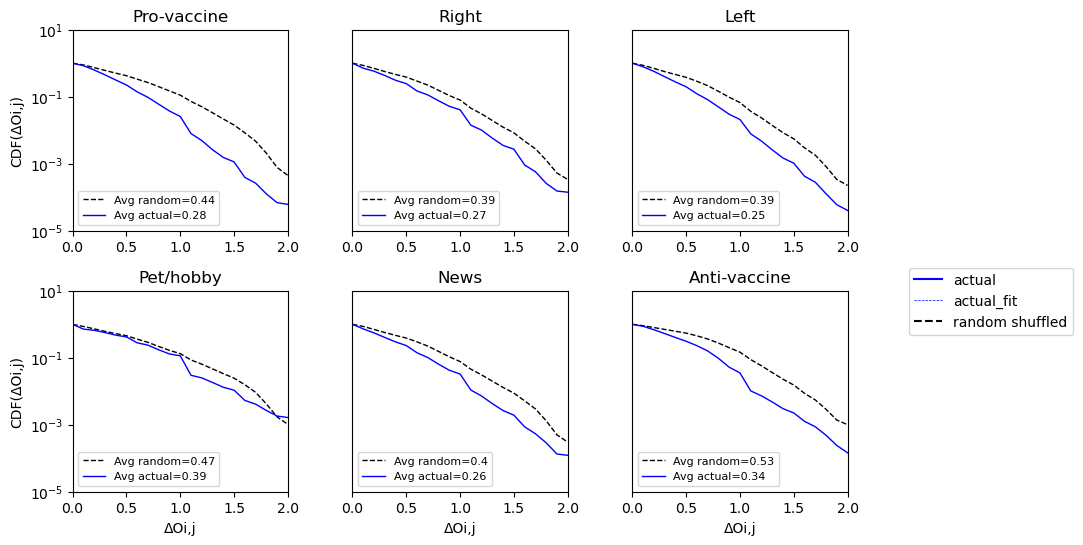

In [130]:
# PDF (|opinion diff|)

reformat=pd.read_excel(r"C:\Maggie\Research Progress\Vaccine_tweet\paper_1\Sample_data\daily_90\node_profile3.xlsx")
reformat=reformat.set_index('Node')
communities=['Pro-vaccine','Right','Left','Pet/hobby','News','Anti-vaccine']
i=1
date_lst=list()
d1=datetime(2020,i,1)
y=2020
while d1<datetime(2022,4,1):
    d1=datetime(y,i,1)
    date_lst.append(d1.date())
    i+=1
    if i>12:
        y+=1
        i=i-12
date_lst=[datetime.strftime(t,"%Y-%m-%d") for t in date_lst]
        
fig=plt.figure(figsize=(10,6))
fig.subplots_adjust(hspace=0.3,wspace=0.3)

def expon(x, a,b):
    return a * 10**(-b * x)


ind=0
for c in communities:
    ind+=1
    ax=fig.add_subplot(2,3,ind)
    print(c)
    data=list()
    data_w=list()
    data2=list()
    data2_w=list()
    data_ran=list()
    data_ran_w=list()
    print('--------------')
    op_dif_ran=pd.DataFrame()
    temp_dict=pd.DataFrame(index=np.round(np.arange(0,2.1,0.1),1))
                
    for i in np.arange(0,30,3):
        print(i,end='\r')
        d1_0=date_lst[i]
        op_dif=pd.read_csv(r"C:\Maggie\Research Progress\Vaccine_tweet\paper_1\Sample_data\daily_90\link_opinion_dff\link_opinion_"+d1_0+"_2.csv",delimiter=" ",header=None,index_col=0)
        #op_dif_shuf=pd.read_csv(r"C:\Maggie\Research Progress\Vaccine_tweet\Sample_data\daily_90\link_opinion_dff\link_opinion_"+d1_0+"_shuf.csv",delimiter=" ",header=None,index_col=0)
        
        #print(op_dif)
        op_dif.loc[:,'difference']=np.round(np.abs(np.asarray(op_dif.loc[:,4])-np.asarray(op_dif.loc[:,5])),1)
        op_dif.loc[:,'community1']=op_dif.loc[:,6]
        op_dif.loc[:,'community2']=op_dif.loc[:,7]
        
        #op_dif_shuf.loc[:,'difference']=np.round(np.abs(np.asarray(op_dif_shuf.loc[:,2])-np.asarray(op_dif_shuf.loc[:,3])),1)
        #op_dif_shuf.loc[:,'community1']=op_dif_shuf.loc[:,4]
        #op_dif_shuf.loc[:,'community2']=op_dif_shuf.loc[:,5]
        
        cls=list(reformat.loc[(reformat['step']==i) & (reformat['com2']==c),'Community'])
        
        if len(cls)>0:
            for cc in cls[:1]:
                data+=list(op_dif.loc[(op_dif["community2"]==cc) & (op_dif["community1"]==cc),'difference'])
                data_w+=list(op_dif.loc[(op_dif["community2"]==cc) & (op_dif["community1"]==cc),3])
                
                #data2+=list(op_dif.loc[((op_dif["community2"]==cc) | (op_dif["community1"]==cc)) & (op_dif["community1"]!=op_dif["community2"]),'difference'])
                #data2_w+=list(op_dif.loc[((op_dif["community2"]==cc) | (op_dif["community1"]==cc)) & (op_dif["community1"]!=op_dif["community2"]),3])
                
                #data_ran+=list(op_dif_shuf.loc[((op_dif_shuf["community2"]==cc) | (op_dif_shuf["community1"]==cc)) ,'difference'])
                #data_ran_w+=list(op_dif_shuf.loc[((op_dif_shuf["community2"]==cc) | (op_dif_shuf["community1"]==cc)) ,1])
                #print(len(list(op_dif.loc[(op_dif["community2"]==cc) & (op_dif["community1"]==cc),'difference'])))
                
                for r in range(1,10):
                    path=r"C:\Maggie\Research Progress\Vaccine_tweet\paper_1\Sample_data\daily_90\link_opinion_dff\link_opinion_monthly_shuffle_"+str(r)+".csv"
                    op_dif_shuf=pd.read_csv(path,delimiter=" ",header=None)
                    op_dif_shuf=op_dif_shuf.loc[(op_dif_shuf[1]==cc) & (op_dif_shuf[0]==d1_0)]
                    
                    for m in range(len(op_dif_shuf)):
                        if r not in temp_dict.columns:
                            temp_dict.loc[:,r]=np.zeros(len(temp_dict))
                            temp_dict=temp_dict.fillna(0)
                        if np.abs(op_dif_shuf.iloc[m,3]) not in temp_dict.index:
                            temp_dict.loc[np.abs(op_dif_shuf.iloc[m,3]),:]=np.zeros(len(temp_dict.columns))
                            temp_dict=temp_dict.fillna(0)
                        temp_dict.loc[np.abs(op_dif_shuf.iloc[m,3]),r]+=op_dif_shuf.iloc[m,4]
                    #temp_dict=temp_dict.fillna(0)
                    temp_dict=temp_dict.sort_index()
                #print(temp_dict)
    
    #print(len(data_ran))
    #data_ran = [x for x, y in zip(data_ran, data_ran_w) for _ in range(y)]
    #print(len(data_ran))
    #yy=collections.Counter(np.round(data_ran,1))
    #yy=dict(sorted(yy.items()))
    temp_dict2=temp_dict.copy()
    temp_dict2.loc[:,:]=np.asarray(temp_dict.loc[:,:])/np.sum(np.asarray(temp_dict.loc[:,:]),axis=0)
    #np.reshape(np.sum(np.asarray(temp_dict.loc[:,:]),axis=1),(len(temp_dict),1))
    temp_dict2.loc[:,'avg']=np.average(np.asarray(temp_dict2.iloc[:,:]),axis=1)
    temp_dict2
    
    temp_dict3=pd.DataFrame(columns=['avg'])
    for dd in temp_dict2.index:
        if np.abs(dd) not in temp_dict3.index:
            temp_dict3.loc[np.abs(dd),'avg']=temp_dict2.loc[dd,'avg']
        else:
            temp_dict3.loc[np.abs(dd),'avg']+=temp_dict2.loc[dd,'avg']
    
    x=list(temp_dict3.index)
    #y=list(yy.values())
    y=list(temp_dict3.loc[:,'avg'])
    print('avg random',np.sum(np.asarray(x)*np.asarray(y)))
    avg=np.sum(np.asarray(x)*np.asarray(y))
    y=[sum(y[n:])/sum(y) for n in range(len(y))]
    #y=[y[n]/sum(y) for n in range(len(y))]
    ax.plot(x,y,linewidth=1,color='black',linestyle='dashed',label='Avg random='+str(np.round(avg,2)))
    
    
    temp_lst=list()
    temp_dict3,len(data)
    for tt in temp_dict3.index:
        temp_lst+=([tt]*int(temp_dict3.loc[tt,'avg']*len(data)))
    temp_lst
    print('t-test',ttest_ind(data,temp_lst))
    print('U-test',scipy.stats.mannwhitneyu(data,temp_lst))
    
    
    #print(len(data))
    #data = [x for x, y in zip(data, data_w) for _ in range(y)]
    #print(len(data))
    yy=collections.Counter(np.round(data,1))
    print("avg actual", np.average(data))
    yy=dict(sorted(yy.items()))
    y=list(yy.values())
    y=[sum(y[n:])/sum(y) for n in range(len(y))]
    #y=[y[n]/sum(y) for n in range(len(y))]
    ax.plot(yy.keys(),y,linewidth=1,color='blue',label='Avg actual='+str(np.round(np.average(data),2)))
    
    
    
    '''
    x=list(yy.keys())
    k=x.index(1)
    x0=np.asarray(x[:k])
    #model2=stats.linregress(x[:k], np.log10(y[:k]))
    model2=stats.linregress(x[:k], np.log(y[:k]))
    b=model2.slope
    a=model2.intercept
    y0=np.exp(b*x0+a)

    ax.plot(x0,y0,linestyle='dashed',color='blue',linewidth=0.5,label='β(ΔOi,j<1)='+str(round(-b,1)))
    
    model2=stats.linregress(x[k+1:], np.log(y[k+1:]))
    b=model2.slope
    a=model2.intercept
    #y0=10**(b*x0+a)
    x0=np.asarray(x[k+1:])
    y0=np.exp(b*x0+a)
    
    ax.plot(x0,y0,linestyle='dashed',color='blue',linewidth=0.5,label='β(ΔOi,j>1)='+str(round(-b,1)))
    '''
    
    
    
    
    ax.set_yscale('log')
    ax.set_xlim([0,2])
    ax.set_ylim([10**(-5),10**1])
    
    ax.set_title(c)
    
    if ind!=1 and ind!=4:
        ax.set_yticks([])
    else:
        ax.set_ylabel("CDF(ΔOi,j)")
        
    if ind==4 or ind==5 or ind==6:
        ax.set_xlabel("ΔOi,j")
        
    plt.legend(fontsize=8,loc='lower left')
    print('')

ax=fig.add_subplot(1,1,1)
plt.plot([0,0],[0,0],color='blue',label='actual')
plt.plot([0,0],[0,0],color='blue',linestyle='dashed',linewidth=0.5,label='actual_fit')

#plt.plot([0,0],[0,0],color='orange',label='inter link')
plt.plot([0,0],[0,0],color='black',linestyle='dashed',label='random shuffled')

plt.legend(bbox_to_anchor=(1.3,0.5))
fig.patch.set_visible(False)
ax.axis('off')


Pro-vaccine
--------------
avg random 0.40265885790876427
t-test Ttest_indResult(statistic=-262.68839176267875, pvalue=0.0)
avg actual 0.281578419926827

Right
--------------
avg random 0.3457049215559854
t-test Ttest_indResult(statistic=-43.684111865675014, pvalue=0.0)
avg actual 0.24283043197936816

Left
--------------
avg random 0.3026209396347414
t-test Ttest_indResult(statistic=-72.98097879147906, pvalue=0.0)
avg actual 0.21585356852904275

Pet/hobby
--------------
avg random 0.44298804947851184
t-test Ttest_indResult(statistic=-39.48490374232637, pvalue=0.0)
avg actual 0.3381991593921759

News
--------------
avg random 0.3769693338113926
t-test Ttest_indResult(statistic=-76.23961816963302, pvalue=0.0)
avg actual 0.24829003786818338

Anti-vaccine
--------------
avg random 0.4491685994782267
t-test Ttest_indResult(statistic=-83.04973868646496, pvalue=0.0)
avg actual 0.3593366631886349



(-0.05500000000000001,
 0.05500000000000001,
 -0.05500000000000001,
 0.05500000000000001)

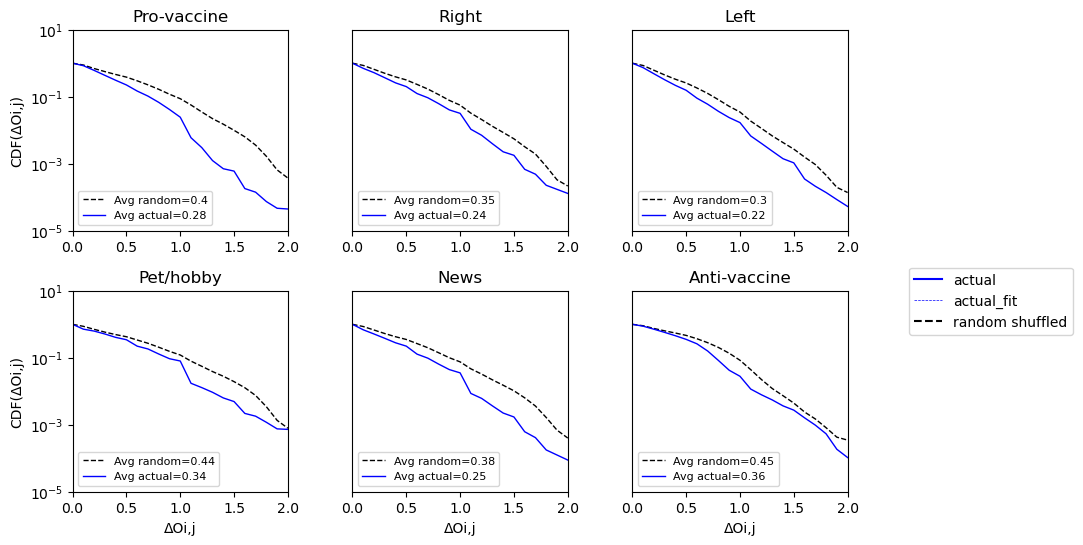

In [8]:
# PDF (|opinion diff|) with neighbour's avg

reformat=pd.read_excel(r"C:\Maggie\Research Progress\Vaccine_tweet\paper_1\Sample_data\daily_90\node_profile3.xlsx")
reformat=reformat.set_index('Node')
communities=['Pro-vaccine','Right','Left','Pet/hobby','News','Anti-vaccine']
i=1
date_lst=list()
d1=datetime(2020,i,1)
y=2020
while d1<datetime(2022,4,1):
    d1=datetime(y,i,1)
    date_lst.append(d1.date())
    i+=1
    if i>12:
        y+=1
        i=i-12
date_lst=[datetime.strftime(t,"%Y-%m-%d") for t in date_lst]
        
fig=plt.figure(figsize=(10,6))
fig.subplots_adjust(hspace=0.3,wspace=0.3)

def expon(x, a,b):
    return a * 10**(-b * x)


ind=0
for c in communities:
    ind+=1
    ax=fig.add_subplot(2,3,ind)
    print(c)
    data=list()
    data_w=list()
    data2=list()
    data2_w=list()
    data_ran=list()
    data_ran_w=list()
    print('--------------')
    op_dif_ran=pd.DataFrame()
    temp_dict=pd.DataFrame(index=np.round(np.arange(0,2.1,0.1),1))
                
    for i in np.arange(0,30,3):
        print(i,end='\r')
        d1_0=date_lst[i]
        #op_dif=pd.read_csv(r"C:\Maggie\Research Progress\Vaccine_tweet\paper_1\Sample_data\daily_90\link_opinion_dff\link_opinion_"+d1_0+"_2.csv",delimiter=" ",header=None,index_col=0)
        op_dif=pd.read_csv(r"C:\Maggie\Research Progress\Vaccine_tweet\paper_1\Sample_data\daily_90\link_opinion_dff\opnion_dif_"+d1_0+"_neighbor_intra.csv",delimiter=" ",header=None,index_col=0)
        op_dif.loc[:,'difference']=np.round(np.abs(np.asarray(op_dif.loc[:,3])-np.asarray(op_dif.loc[:,6])),1)
        op_dif.loc[:,'community1']=op_dif.loc[:,2]
        op_dif.loc[:,'community2']=op_dif.loc[:,2]
        
        cls=list(reformat.loc[(reformat['step']==i) & (reformat['com2']==c),'Community'])
        
        if len(cls)>0:
            for cc in cls[:1]:
                data+=list(op_dif.loc[(op_dif["community2"]==cc) & (op_dif["community1"]==cc),'difference'])
                data_w+=list(op_dif.loc[(op_dif["community2"]==cc) & (op_dif["community1"]==cc),3])
                
                #data2+=list(op_dif.loc[((op_dif["community2"]==cc) | (op_dif["community1"]==cc)) & (op_dif["community1"]!=op_dif["community2"]),'difference'])
                #data2_w+=list(op_dif.loc[((op_dif["community2"]==cc) | (op_dif["community1"]==cc)) & (op_dif["community1"]!=op_dif["community2"]),3])
                
                #data_ran+=list(op_dif_shuf.loc[((op_dif_shuf["community2"]==cc) | (op_dif_shuf["community1"]==cc)) ,'difference'])
                #data_ran_w+=list(op_dif_shuf.loc[((op_dif_shuf["community2"]==cc) | (op_dif_shuf["community1"]==cc)) ,1])
                #print(len(list(op_dif.loc[(op_dif["community2"]==cc) & (op_dif["community1"]==cc),'difference'])))
                
                for r in range(1,10):
                    path=r"C:\Maggie\Research Progress\Vaccine_tweet\paper_1\Sample_data\daily_90\link_opinion_dff\link_opinion_monthly_shuffle2_"+str(r)+".csv"
                    op_dif_shuf=pd.read_csv(path,delimiter=" ",header=None)
                    op_dif_shuf=op_dif_shuf.loc[(op_dif_shuf[1]==cc) & (op_dif_shuf[0]==d1_0)]
                    
                    for m in range(len(op_dif_shuf)):
                        if r not in temp_dict.columns:
                            temp_dict.loc[:,r]=np.zeros(len(temp_dict))
                            temp_dict=temp_dict.fillna(0)
                        if np.abs(op_dif_shuf.iloc[m,3]) not in temp_dict.index:
                            temp_dict.loc[np.abs(op_dif_shuf.iloc[m,3]),:]=np.zeros(len(temp_dict.columns))
                            temp_dict=temp_dict.fillna(0)
                        temp_dict.loc[np.abs(op_dif_shuf.iloc[m,3]),r]+=op_dif_shuf.iloc[m,4]
                    #temp_dict=temp_dict.fillna(0)
                    temp_dict=temp_dict.sort_index()
                #print(temp_dict)
    
    #print(len(data_ran))
    #data_ran = [x for x, y in zip(data_ran, data_ran_w) for _ in range(y)]
    #print(len(data_ran))
    #yy=collections.Counter(np.round(data_ran,1))
    #yy=dict(sorted(yy.items()))
    temp_dict2=temp_dict.copy()
    temp_dict2.loc[:,:]=np.asarray(temp_dict.loc[:,:])/np.sum(np.asarray(temp_dict.loc[:,:]),axis=0)
    #np.reshape(np.sum(np.asarray(temp_dict.loc[:,:]),axis=1),(len(temp_dict),1))
    temp_dict2.loc[:,'avg']=np.average(np.asarray(temp_dict2.iloc[:,:]),axis=1)
    temp_dict2
    
    temp_dict3=pd.DataFrame(columns=['avg'])
    for dd in temp_dict2.index:
        if np.abs(dd) not in temp_dict3.index:
            temp_dict3.loc[np.abs(dd),'avg']=temp_dict2.loc[dd,'avg']
        else:
            temp_dict3.loc[np.abs(dd),'avg']+=temp_dict2.loc[dd,'avg']
    
    x=list(temp_dict3.index)
    #y=list(yy.values())
    y=list(temp_dict3.loc[:,'avg'])
    print('avg random',np.sum(np.asarray(x)*np.asarray(y)))
    avg=np.sum(np.asarray(x)*np.asarray(y))
    
    y=[sum(y[n:])/sum(y) for n in range(len(y))]
    #y=[y[n]/sum(y) for n in range(len(y))]
    ax.plot(x,y,linewidth=1,color='black',linestyle='dashed',label='Avg random='+str(np.round(avg,2)))
    temp_lst=list()
    temp_dict3,len(data)
    for tt in temp_dict3.index:
        temp_lst+=([tt]*int(temp_dict3.loc[tt,'avg']*len(data)))
    temp_lst
    print('t-test',ttest_ind(data,temp_lst))
    
    
    #print(len(data))
    #data = [x for x, y in zip(data, data_w) for _ in range(y)]
    #print(len(data))
    yy=collections.Counter(np.round(data,1))
    print("avg actual", np.average(data))
    yy=dict(sorted(yy.items()))
    y=list(yy.values())
    y=[sum(y[n:])/sum(y) for n in range(len(y))]
    #y=[y[n]/sum(y) for n in range(len(y))]
    ax.plot(yy.keys(),y,linewidth=1,color='blue',label='Avg actual='+str(np.round(np.average(data),2)))
    
    '''
    x=list(yy.keys())
    k=x.index(1)
    x0=np.asarray(x[:k])
    #model2=stats.linregress(x[:k], np.log10(y[:k]))
    model2=stats.linregress(x[:k], np.log(y[:k]))
    b=model2.slope
    a=model2.intercept
    y0=np.exp(b*x0+a)

    ax.plot(x0,y0,linestyle='dashed',color='blue',linewidth=0.5,label='β(ΔOi,j<1)='+str(round(-b,1)))
    
    model2=stats.linregress(x[k+1:], np.log(y[k+1:]))
    b=model2.slope
    a=model2.intercept
    #y0=10**(b*x0+a)
    x0=np.asarray(x[k+1:])
    y0=np.exp(b*x0+a)
    
    ax.plot(x0,y0,linestyle='dashed',color='blue',linewidth=0.5,label='β(ΔOi,j>1)='+str(round(-b,1)))
    '''
    
    
    
    
    ax.set_yscale('log')
    ax.set_xlim([0,2])
    ax.set_ylim([10**(-5),10**1])
    
    ax.set_title(c)
    
    if ind!=1 and ind!=4:
        ax.set_yticks([])
    else:
        ax.set_ylabel("CDF(ΔOi,j)")
        
    if ind==4 or ind==5 or ind==6:
        ax.set_xlabel("ΔOi,j")
        
    plt.legend(fontsize=8,loc='lower left')
    print('')

ax=fig.add_subplot(1,1,1)
plt.plot([0,0],[0,0],color='blue',label='actual')
plt.plot([0,0],[0,0],color='blue',linestyle='dashed',linewidth=0.5,label='actual_fit')

#plt.plot([0,0],[0,0],color='orange',label='inter link')
plt.plot([0,0],[0,0],color='black',linestyle='dashed',label='random shuffled')

plt.legend(bbox_to_anchor=(1.3,0.5))
fig.patch.set_visible(False)
ax.axis('off')


Pro-vaccine
--------------
avg pairs 0.2835653086550457
avg neighbour 0.281578419926827

Right
--------------
avg pairs 0.2736568052863847
avg neighbour 0.24283043197936816

Left
--------------
avg pairs 0.2541657992083265
avg neighbour 0.21585356852904275

Pet/hobby
--------------
avg pairs 0.3900037741387625
avg neighbour 0.3381991593921759

News
--------------
avg pairs 0.2632845707093602
avg neighbour 0.24829003786818338

Anti-vaccine
--------------


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


avg pairs 0.3416377182501127
avg neighbour 0.3593366631886349



(0.0, 1.0, 0.0, 1.0)

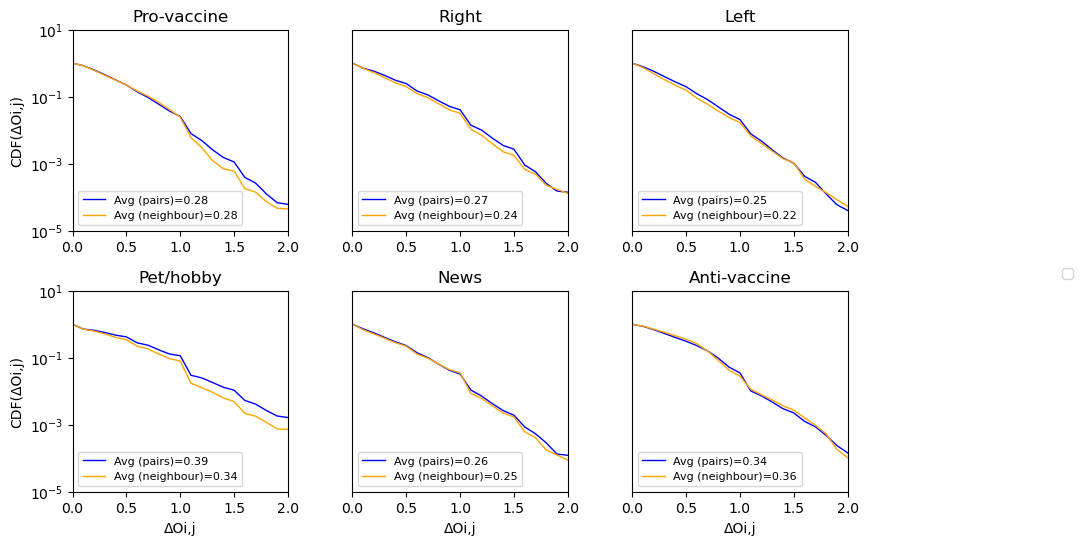

In [10]:
# PDF (|opinion diff|) with neighbour's avg vs. pair

reformat=pd.read_excel(r"C:\Maggie\Research Progress\Vaccine_tweet\paper_1\Sample_data\daily_90\node_profile3.xlsx")
reformat=reformat.set_index('Node')
communities=['Pro-vaccine','Right','Left','Pet/hobby','News','Anti-vaccine']
i=1
date_lst=list()
d1=datetime(2020,i,1)
y=2020
while d1<datetime(2022,4,1):
    d1=datetime(y,i,1)
    date_lst.append(d1.date())
    i+=1
    if i>12:
        y+=1
        i=i-12
date_lst=[datetime.strftime(t,"%Y-%m-%d") for t in date_lst]
        
fig=plt.figure(figsize=(10,6))
fig.subplots_adjust(hspace=0.3,wspace=0.3)

def expon(x, a,b):
    return a * 10**(-b * x)


ind=0
for c in communities:
    ind+=1
    ax=fig.add_subplot(2,3,ind)
    print(c)
    data=list()
    data_w=list()
    data2=list()
    data2_w=list()
    data_ran=list()
    data_ran_w=list()
    print('--------------')
    op_dif_ran=pd.DataFrame()
    for i in np.arange(0,30,3):
        print(i,end='\r')
        d1_0=date_lst[i]
        #op_dif=pd.read_csv(r"C:\Maggie\Research Progress\Vaccine_tweet\paper_1\Sample_data\daily_90\link_opinion_dff\link_opinion_"+d1_0+"_2.csv",delimiter=" ",header=None,index_col=0)
        op_dif=pd.read_csv(r"C:\Maggie\Research Progress\Vaccine_tweet\paper_1\Sample_data\daily_90\link_opinion_dff\link_opinion_"+d1_0+"_2.csv",delimiter=" ",header=None,index_col=0)
        op_dif.loc[:,'difference']=np.round(np.abs(np.asarray(op_dif.loc[:,4])-np.asarray(op_dif.loc[:,5])),1)
        op_dif.loc[:,'community1']=op_dif.loc[:,6]
        op_dif.loc[:,'community2']=op_dif.loc[:,7]
        
        
        op_dif2=pd.read_csv(r"C:\Maggie\Research Progress\Vaccine_tweet\paper_1\Sample_data\daily_90\link_opinion_dff\opnion_dif_"+d1_0+"_neighbor_intra.csv",delimiter=" ",header=None,index_col=0)
        op_dif2.loc[:,'difference']=np.round(np.abs(np.asarray(op_dif2.loc[:,3])-np.asarray(op_dif2.loc[:,6])),1)
        op_dif2.loc[:,'community1']=op_dif2.loc[:,2]
        op_dif2.loc[:,'community2']=op_dif2.loc[:,2]
        
        cls=list(reformat.loc[(reformat['step']==i) & (reformat['com2']==c),'Community'])
        
        if len(cls)>0:
            for cc in cls[:1]:
                data+=list(op_dif.loc[(op_dif["community2"]==cc) & (op_dif["community1"]==cc),'difference'])
                data2+=list(op_dif2.loc[(op_dif2["community2"]==cc) & (op_dif2["community1"]==cc),'difference'])
                
    yy=collections.Counter(np.round(data,1))
    print("avg pairs", np.average(data))
    yy=dict(sorted(yy.items()))
    y=list(yy.values())
    y=[sum(y[n:])/sum(y) for n in range(len(y))]
    #y=[y[n]/sum(y) for n in range(len(y))]
    ax.plot(yy.keys(),y,linewidth=1,color='blue',label='Avg (pairs)='+str(round(np.average(data),2)))
    
    yy=collections.Counter(np.round(data2,1))
    print("avg neighbour", np.average(data2))
    yy=dict(sorted(yy.items()))
    y=list(yy.values())
    y=[sum(y[n:])/sum(y) for n in range(len(y))]
    #y=[y[n]/sum(y) for n in range(len(y))]
    ax.plot(yy.keys(),y,linewidth=1,color='orange',label='Avg (neighbour)='+str(round(np.average(data2),2)))
    
    
    ax.set_yscale('log')
    ax.set_xlim([0,2])
    ax.set_ylim([10**(-5),10**1])
    
    ax.set_title(c)
    
    if ind!=1 and ind!=4:
        ax.set_yticks([])
    else:
        ax.set_ylabel("CDF(ΔOi,j)")
        
    if ind==4 or ind==5 or ind==6:
        ax.set_xlabel("ΔOi,j")
        
    plt.legend(fontsize=8,loc='lower left')
    print('')

ax=fig.add_subplot(1,1,1)
plt.legend(bbox_to_anchor=(1.3,0.5))
fig.patch.set_visible(False)
ax.axis('off')


In [24]:
# PDF (|opinion diff|) log(e)

reformat=pd.read_excel(r"C:\Maggie\Research Progress\Vaccine_tweet\Sample_data\daily_90\node_profile3.xlsx")
reformat=reformat.set_index('Node')
communities=['Pro-vaccine','Right','Left','Pet/hobby','News','Anti-vaccine']
i=1
date_lst=list()
d1=datetime(2020,i,1)
y=2020
while d1<datetime(2022,4,1):
    d1=datetime(y,i,1)
    date_lst.append(d1.date())
    i+=1
    if i>12:
        y+=1
        i=i-12
date_lst=[datetime.strftime(t,"%Y-%m-%d") for t in date_lst]
        
fig=plt.figure(figsize=(10,6))
fig.subplots_adjust(hspace=0.3,wspace=0.3)

def expon(x, a,b):
    return a * 10**(-b * x)


ind=0
for c in communities:
    ind+=1
    ax=fig.add_subplot(2,3,ind)
    print(c)
    data=list()
    data_w=list()
    data2=list()
    data2_w=list()
    data_ran=list()
    data_ran_w=list()
    print('--------------')
    op_dif_ran=pd.DataFrame()
    for i in np.arange(0,30,3):
        print(i,end='\r')
        d1_0=date_lst[i]
        op_dif=pd.read_csv(r"C:\Maggie\Research Progress\Vaccine_tweet\Sample_data\daily_90\link_opinion_dff\link_opinion_"+d1_0+"_2.csv",delimiter=" ",header=None,index_col=0)
        op_dif_shuf=pd.read_csv(r"C:\Maggie\Research Progress\Vaccine_tweet\Sample_data\daily_90\link_opinion_dff\link_opinion_"+d1_0+"_shuf.csv",delimiter=" ",header=None,index_col=0)
        
        #print(op_dif)
        op_dif.loc[:,'difference']=np.round(np.abs(np.asarray(op_dif.loc[:,4])-np.asarray(op_dif.loc[:,5])),1)
        op_dif.loc[:,'community1']=op_dif.loc[:,6]
        op_dif.loc[:,'community2']=op_dif.loc[:,7]
        
        op_dif_shuf.loc[:,'difference']=np.round(np.abs(np.asarray(op_dif_shuf.loc[:,2])-np.asarray(op_dif_shuf.loc[:,3])),1)
        op_dif_shuf.loc[:,'community1']=op_dif_shuf.loc[:,4]
        op_dif_shuf.loc[:,'community2']=op_dif_shuf.loc[:,5]
        
        cls=list(reformat.loc[(reformat['step']==i) & (reformat['com2']==c),'Community'])
        
        if len(cls)>0:
            for cc in cls[:1]:
                data+=list(op_dif.loc[(op_dif["community2"]==cc) & (op_dif["community1"]==cc),'difference'])
                data_w+=list(op_dif.loc[(op_dif["community2"]==cc) & (op_dif["community1"]==cc),3])
                
                #data2+=list(op_dif.loc[((op_dif["community2"]==cc) | (op_dif["community1"]==cc)) & (op_dif["community1"]!=op_dif["community2"]),'difference'])
                #data2_w+=list(op_dif.loc[((op_dif["community2"]==cc) | (op_dif["community1"]==cc)) & (op_dif["community1"]!=op_dif["community2"]),3])
                
                data_ran+=list(op_dif_shuf.loc[((op_dif_shuf["community2"]==cc) & (op_dif_shuf["community1"]==cc)) ,'difference'])
                data_ran_w+=list(op_dif_shuf.loc[((op_dif_shuf["community2"]==cc) & (op_dif_shuf["community1"]==cc)) ,1])
                #print(len(list(op_dif.loc[(op_dif["community2"]==cc) & (op_dif["community1"]==cc),'difference'])))
                
    
    
    #print(len(data_ran))
    #data_ran = [x for x, y in zip(data_ran, data_ran_w) for _ in range(y)]
    #print(len(data_ran))
    yy=collections.Counter(np.round(data_ran,1))
    print("avg ran", np.average(data_ran))
    yy=dict(sorted(yy.items()))
    y=list(yy.values())
    #y=[sum(y[n:])/sum(y) for n in range(len(y))]
    y=[y[n]/sum(y) for n in range(len(y))]
    ax.plot(yy.keys(),y,linewidth=1,color='black',linestyle='dashed')
    
    #print(len(data))
    #data = [x for x, y in zip(data, data_w) for _ in range(y)]
    #print(len(data))
    yy=collections.Counter(np.round(data,1))
    print("avg actual", np.average(data))
    yy=dict(sorted(yy.items()))
    y=list(yy.values())
    #y=[sum(y[n:])/sum(y) for n in range(len(y))]
    y=[y[n]/sum(y) for n in range(len(y))]
    ax.plot(yy.keys(),y,linewidth=1,color='blue')
    
    x=list(yy.keys())
    k=x.index(1)
    x0=np.asarray(x[:k])
    #model2=stats.linregress(x[:k], np.log10(y[:k]))
    model2=stats.linregress(x[:k], np.log(y[:k]))
    b=model2.slope
    a=model2.intercept
    #y0=10**(b*x0+a)
    y0=np.exp(b*x0+a)

    ax.plot(x0,y0,linestyle='dashed',color='blue',linewidth=0.5,label='β(ΔOi,j<1)='+str(round(-b,1)))
    
    #'''
    #model2=stats.linregress(x[k+1:], np.log10(y[k+1:]))
    model2=stats.linregress(x[k+1:], np.log(y[k+1:]))
    b=model2.slope
    a=model2.intercept
    #y0=10**(b*x0+a)
    x0=np.asarray(x[k+1:])
    y0=np.exp(b*x0+a)
    
    ax.plot(x0,y0,linestyle='dashed',color='blue',linewidth=0.5,label='β(ΔOi,j>1)='+str(round(-b,1)))
    #'''
    
    
    
    
    ax.set_yscale('log')
    ax.set_xlim([0,2])
    ax.set_ylim([10**(-5),10**0])
    
    ax.set_title(c)
    
    if ind!=1 and ind!=4:
        ax.set_yticks([])
    else:
        ax.set_ylabel("PDF(ΔOi,j)")
        
    if ind==4 or ind==5 or ind==6:
        ax.set_xlabel("ΔOi,j")
        
    plt.legend(fontsize=8,loc='lower left')

ax=fig.add_subplot(1,1,1)
plt.plot([0,0],[0,0],color='blue',label='actual')
plt.plot([0,0],[0,0],color='blue',linestyle='dashed',linewidth=0.5,label='fitted')

#plt.plot([0,0],[0,0],color='orange',label='inter link')
plt.plot([0,0],[0,0],color='black',linestyle='dashed',label='random shuffled')

plt.legend(bbox_to_anchor=(1.3,0.5))
fig.patch.set_visible(False)
ax.axis('off')

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Maggie\\Research Progress\\Vaccine_tweet\\Sample_data\\daily_90\\node_profile3.xlsx'

Pro-vaccine
--------------
avg pairs 0.2835653086550457
avg neighbour 0.3008071477208274

Right
--------------
avg pairs 0.2736568052863847
avg neighbour 0.2901292806169122

Left
--------------
avg pairs 0.2541657992083265
avg neighbour 0.26715257580593205

Pet/hobby
--------------
avg pairs 0.3900037741387625
avg neighbour 0.37843765600090173

News
--------------
avg pairs 0.2632845707093602
avg neighbour 0.275022867179331

Anti-vaccine
--------------
avg pairs 0.3416377182501127
avg neighbour 0.3502042867889694


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(0.0, 1.0, 0.0, 1.0)

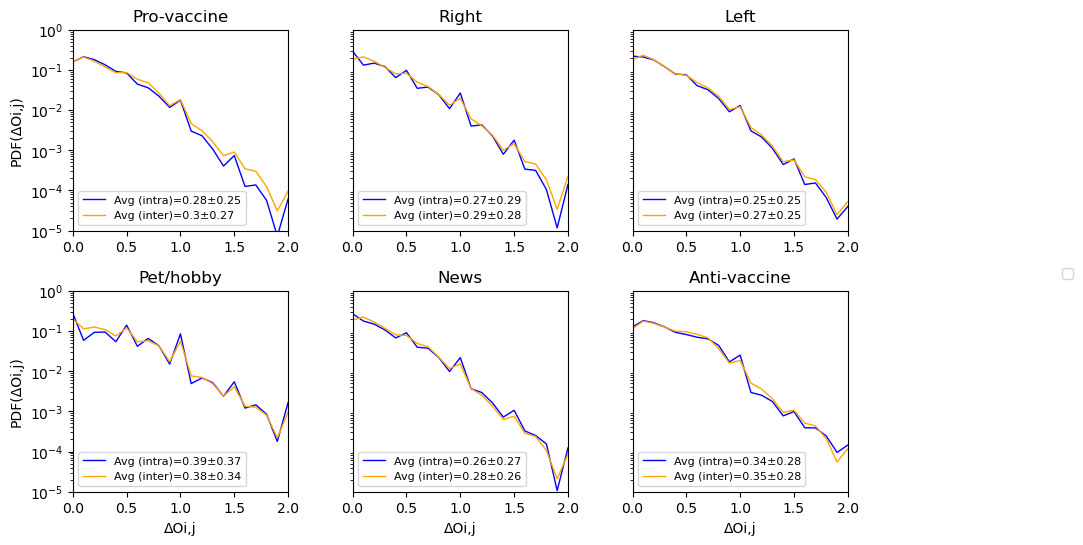

In [12]:
# PDF (|opinion diff|)

reformat=pd.read_excel(r"C:\Maggie\Research Progress\Vaccine_tweet\paper_1\Sample_data\daily_90\node_profile3.xlsx")
reformat=reformat.set_index('Node')
communities=['Pro-vaccine','Right','Left','Pet/hobby','News','Anti-vaccine']
i=1
date_lst=list()
d1=datetime(2020,i,1)
y=2020
while d1<datetime(2022,4,1):
    d1=datetime(y,i,1)
    date_lst.append(d1.date())
    i+=1
    if i>12:
        y+=1
        i=i-12
date_lst=[datetime.strftime(t,"%Y-%m-%d") for t in date_lst]
        
fig=plt.figure(figsize=(10,6))
fig.subplots_adjust(hspace=0.3,wspace=0.3)

def expon(x, a,b):
    return a * 10**(-b * x)


ind=0
for c in communities:
    ind+=1
    ax=fig.add_subplot(2,3,ind)
    print(c)
    data=list()
    data_w=list()
    data2=list()
    data2_w=list()
    data_ran=list()
    data_ran_w=list()
    print('--------------')
    op_dif_ran=pd.DataFrame()
    for i in np.arange(0,30,3):
        print(i,end='\r')
        d1_0=date_lst[i]
        op_dif=pd.read_csv(r"C:\Maggie\Research Progress\Vaccine_tweet\paper_1\Sample_data\daily_90\link_opinion_dff\link_opinion_"+d1_0+"_2.csv",delimiter=" ",header=None,index_col=0)
        op_dif_shuf=pd.read_csv(r"C:\Maggie\Research Progress\Vaccine_tweet\paper_1\Sample_data\daily_90\link_opinion_dff\link_opinion_"+d1_0+"_shuf.csv",delimiter=" ",header=None,index_col=0)
        
        #print(op_dif)
        op_dif.loc[:,'difference']=np.round(np.abs(np.asarray(op_dif.loc[:,4])-np.asarray(op_dif.loc[:,5])),1)
        op_dif.loc[:,'community1']=op_dif.loc[:,6]
        op_dif.loc[:,'community2']=op_dif.loc[:,7]
        
        op_dif_shuf.loc[:,'difference']=np.round(np.abs(np.asarray(op_dif_shuf.loc[:,2])-np.asarray(op_dif_shuf.loc[:,3])),1)
        op_dif_shuf.loc[:,'community1']=op_dif_shuf.loc[:,4]
        op_dif_shuf.loc[:,'community2']=op_dif_shuf.loc[:,5]
        
        cls=list(reformat.loc[(reformat['step']==i) & (reformat['com2']==c),'Community'])
        
        if len(cls)>0:
            for cc in cls[:1]:
                data+=list(op_dif.loc[(op_dif["community2"]==cc) & (op_dif["community1"]==cc),'difference'])
                
                data2+=list(op_dif.loc[((op_dif["community2"]==cc) | (op_dif["community1"]==cc)) & (op_dif["community1"]!=op_dif["community2"]),'difference'])
                
                data_ran+=list(op_dif_shuf.loc[((op_dif_shuf["community2"]==cc) | (op_dif_shuf["community1"]==cc)) ,'difference'])
                #print(len(list(op_dif.loc[(op_dif["community2"]==cc) & (op_dif["community1"]==cc),'difference'])))
                
    
    yy=collections.Counter(np.round(data,1))
    print("avg pairs", np.average(data))
    yy=dict(sorted(yy.items()))
    y=list(yy.values())
    #y=[sum(y[n:])/sum(y) for n in range(len(y))]
    y=[y[n]/sum(y) for n in range(len(y))]
    ax.plot(yy.keys(),y,linewidth=1,color='blue',label='Avg (intra)='+str(round(np.average(data),2))+str('±')+str(np.round(np.std(data),2)))
    
    yy=collections.Counter(np.round(data2,1))
    print("avg neighbour", np.average(data2))
    yy=dict(sorted(yy.items()))
    y=list(yy.values())
    #y=[sum(y[n:])/sum(y) for n in range(len(y))]
    y=[y[n]/sum(y) for n in range(len(y))]
    ax.plot(yy.keys(),y,linewidth=1,color='orange',label='Avg (inter)='+str(round(np.average(data2),2))+str('±')+str(np.round(np.std(data2),2)))
    
    
    ax.set_yscale('log')
    ax.set_xlim([0,2])
    ax.set_ylim([10**(-5),10**0])
    
    ax.set_title(c)
    
    if ind!=1 and ind!=4:
        ax.set_yticks([])
    else:
        ax.set_ylabel("PDF(ΔOi,j)")
        
    if ind==4 or ind==5 or ind==6:
        ax.set_xlabel("ΔOi,j")
        
    plt.legend(fontsize=8,loc='lower left')
    print('')

ax=fig.add_subplot(1,1,1)
plt.legend(bbox_to_anchor=(1.3,0.5))
fig.patch.set_visible(False)
ax.axis('off')


### opinion distribution by community and  outdegree

In [356]:
# read and pre-process data

path=r"C:\Maggie\Research Progress\Vaccine_tweet\Sample_data\daily_90\date_u_rtuser_com_summary_quarter.txt"
com_df=pd.read_csv(path,delimiter=" ",header=None,index_col=0)
com_df=com_df.iloc[:-2,:]
com_df

path=r"C:\Maggie\Research Progress\Vaccine_tweet\Sample_data\daily_90\date_u_rtuser_class_summary_quarter2.txt"
opinion_df=pd.read_csv(path,delimiter=" ",header=None,index_col=0)
opinion_df=opinion_df.iloc[:-2,:]
opinion_df

path=r"C:\Maggie\Research Progress\Vaccine_tweet\Sample_data\daily_90\date_u_rtuser_tweetct.txt"
tweet_ct=pd.read_csv(path,delimiter=" ",header=None,index_col=0)

user_degree=pd.read_csv(r"C:\Maggie\Research Progress\Vaccine_tweet\Sample_data\3_phases\u_in_outdegree_adjust.txt",delimiter=",",index_col=0,header=None)
user_degree=user_degree.iloc[:-2,:]

temp_df=opinion_df.copy()
temp_df=temp_df.loc[:,1:10]
temp_df=temp_df.replace(9,0)
temp_df.loc[:,'count_nonz_op']=np.zeros(len(opinion_df.index))+10-np.sum(np.asarray(opinion_df.loc[:,1:10]==9)+np.zeros((len(opinion_df.index),10)),axis=1)
temp_df.loc[:,'total']=np.asarray(np.sum(temp_df.loc[:,1:10],axis=1))
temp_df

temp_df2=com_df.copy()
temp_df2=temp_df2.loc[:,1:10]
temp_df2.loc[:,:]=np.asarray(temp_df2.loc[:,:])+1

for i in range(1,11):
    temp_df.loc[:,i+10]=temp_df2.loc[:,i]

temp_df.loc[:,'count_nonz_com']=np.zeros(len(temp_df2.index))+10-np.sum(np.asarray(temp_df2.loc[:,1:10]==0)+np.zeros((len(temp_df2.index),10)),axis=1)
temp_df=temp_df.loc[(temp_df['count_nonz_op']>1) & (temp_df['count_nonz_com']>1)]
#temp_df.loc[:,'in_degree']=user_degree.loc[:,11]
temp_df.loc[:,'out_degree']=user_degree.loc[:,12]
temp_df.loc[:,'community']=user_degree.loc[:,1]

temp_df.loc[:,'com_change']=np.zeros(len(temp_df))
temp_df.loc[:,'count_uniq_com']=np.zeros(len(temp_df))


'''
i=0
print(len(temp_df))
for t in temp_df.index:
    i+=1
    print(i,end='\r')
    temp=list(temp_df.loc[t,11:20])
    temp=[t for t in temp if t!=0]
    temp_df.loc[t,'count_uniq_com']=len(list(set(temp)))
    temp_df.loc[t,'com_change']=1-np.average([int(temp[t]==temp[t-1]) for t in range(1,len(temp))])
'''

C:\Users\maggie\AppData\Local\Temp\ipykernel_9948\4269726716.py:4: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  com_df=pd.read_csv(path,delimiter=" ",header=None,index_col=0)
C:\Users\maggie\AppData\Local\Temp\ipykernel_9948\4269726716.py:9: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  opinion_df=pd.read_csv(path,delimiter=" ",header=None,index_col=0)
C:\Users\maggie\AppData\Local\Temp\ipykernel_9948\4269726716.py:14: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  tweet_ct=pd.read_csv(path,delimiter=" ",header=None,index_col=0)
C:\Users\maggie\AppData\Local\Temp\ipykernel_9948\4269726716.py:16: DtypeWarning: Columns (0,13) have mixed types. Specify dtype option on import or set low_memory=False.
  user_degree=pd.read_csv(r"C:\Maggie\Research Progress\Vaccine_tweet\Sample_data\3_phases\u_in_outdegree_adjust.txt",delimite

"\ni=0\nprint(len(temp_df))\nfor t in temp_df.index:\n    i+=1\n    print(i,end='\r')\n    temp=list(temp_df.loc[t,11:20])\n    temp=[t for t in temp if t!=0]\n    temp_df.loc[t,'count_uniq_com']=len(list(set(temp)))\n    temp_df.loc[t,'com_change']=1-np.average([int(temp[t]==temp[t-1]) for t in range(1,len(temp))])\n"

25931
         -1.0      -0.7      -0.4       0.0       0.4       0.7
0.0  0.000360  0.000884  0.041501  0.437962  0.346958  0.172335
1.0  0.000490  0.001470  0.095100  0.667394  0.197016  0.038530
2.0  0.000210  0.001677  0.120310  0.727520  0.122825  0.027458
3.0  0.000678  0.000678  0.136364  0.732022  0.105834  0.024423
4.0  0.000000  0.000000  0.142405  0.715190  0.107595  0.034810
5.0  0.000000  0.000000  0.166667  0.833333  0.000000  0.000000
26400
         -1.0      -0.7      -0.4       0.0       0.4       0.7
0.0  0.003075  0.006765  0.103629  0.538438  0.246579  0.101514
1.0  0.003105  0.016765  0.232226  0.642037  0.084446  0.021422
2.0  0.001484  0.010386  0.272997  0.691395  0.017804  0.005935
3.0  0.000000  0.010417  0.312500  0.677083  0.000000  0.000000
4.0  0.000000  0.000000  0.133333  0.866667  0.000000  0.000000
5.0  0.000000  0.000000  0.500000  0.500000  0.000000  0.000000
3974
         -1.0      -0.7      -0.4       0.0       0.4       0.7
0.0  0.308033  0.301677

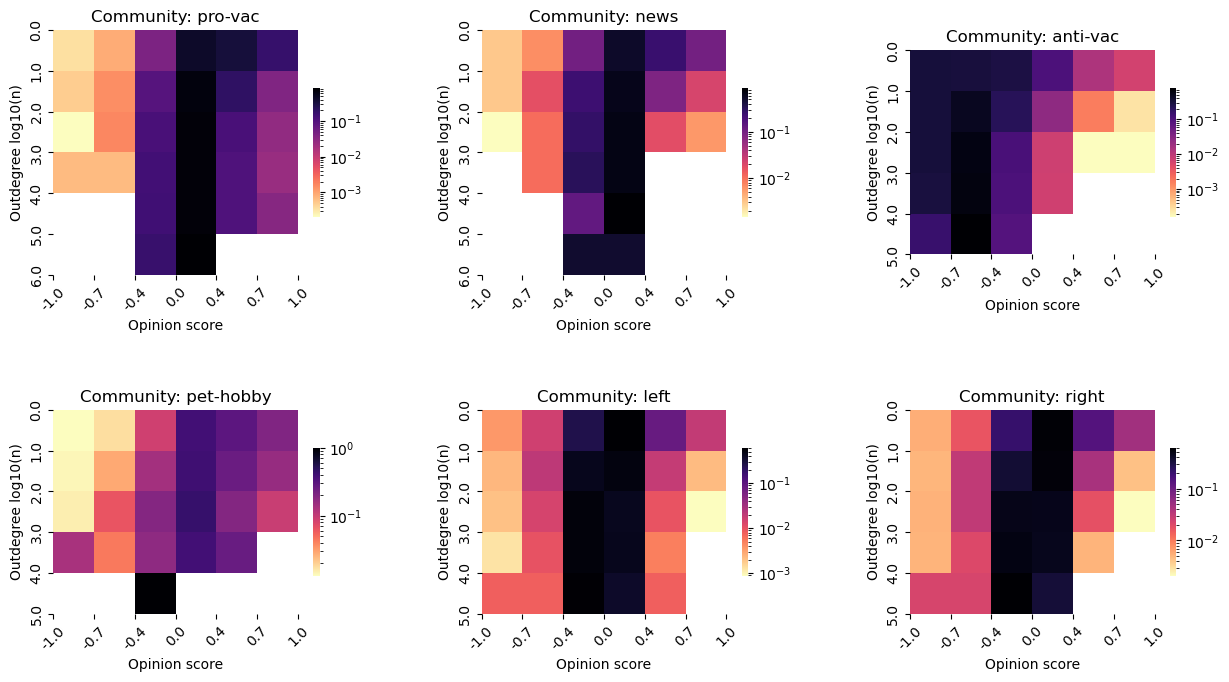

In [360]:
fig=plt.figure(figsize=(15,8))
fig.subplots_adjust(hspace=0.4,wspace=0.4)
com_dict={25931:'pro-vac',26400:'news',3974:'anti-vac',4972:'pet-hobby',32763:'left',22613:'right'}
ind=1

for c in list(com_dict.keys()):
    print(c)
    ax=fig.add_subplot(2,3,ind)
    ind+=1
    temp_df0=temp_df.copy()
    temp_df0=temp_df0.loc[(temp_df0['total']!=1) & (temp_df0['total']!=-1)]
    temp_df0=temp_df0.loc[temp_df0['community']==c]
    temp_df0=temp_df0.loc[temp_df0['count_uniq_com']<3]

    x=temp_df0.loc[:,'total']/temp_df0.loc[:,'count_nonz_op']
    y=np.log10(np.asarray(temp_df0.loc[:,'out_degree'])+1)

    #plt.hist2d(x,y,norm="log",bins=(10,5))
    x_range=[-1,-0.7,-0.4,0,0.4,0.7,1]
    y_range=np.arange(0,max(y)+1,1)
    a=np.histogram2d(x,y,bins=(x_range,y_range))

    data=pd.DataFrame()
    for i in range(len(a[1])-1):
        for j in range(len(a[2])-1):
            data.loc[round(a[2][j],1),round(a[1][i],1)]=a[0][i,j]
    #data.iloc[:,:]=np.asarray(data.iloc[:,:])/np.sum(np.asarray(data.iloc[:,:]),axis=0)
    data.iloc[:,:]=np.asarray(data.iloc[:,:])/np.reshape(np.sum(np.asarray(data.iloc[:,:]),axis=1),(len(data),1))

    sns.heatmap(data,square=True,cbar_kws={"shrink": 0.5},cmap='magma_r',norm=LogNorm())
    plt.xticks(np.arange(len(a[1])), np.round(a[1][:],1), rotation=45)
    plt.yticks(np.arange(len(a[2])), np.round(a[2][:],0), rotation=90)
    ax.set_title('Community: '+com_dict[c])
    ax.set_ylabel('Outdegree log10(n)')
    ax.set_xlabel('Opinion score')
    print(data)

### Conditional probability of community and opinions

In [86]:
for t in range(1,11):
    print(t,end='\r')
    if t==1:
        opinion_df.loc[:,str(t)+"_1"]=opinion_df.loc[:,t]
    else:
        opinion_df.loc[:,str(t)+"_1"]=opinion_df.loc[:,str(t-1)+"_1"]
        opinion_df.loc[opinion_df[t]!=9,str(t)+"_1"]=opinion_df.loc[opinion_df[t]!=9,t]

for t in range(1,11):
    print(t,end='\r')
    if t==1:
        com_df.loc[:,str(t)+"_1"]=com_df.loc[:,t]
    else:
        com_df.loc[:,str(t)+"_1"]=com_df.loc[:,str(t-1)+"_1"]
        com_df.loc[com_df[t]!=-1,str(t)+"_1"]=com_df.loc[com_df[t]!=-1,t]


for t in range(1,11):
    print(t,end='\r')
    if t==1:
        tweet_ct.loc[:,str(t)+"_1"]=tweet_ct.loc[:,t]
    else:
        tweet_ct.loc[:,str(t)+"_1"]=tweet_ct.loc[:,str(t-1)+"_1"]
        tweet_ct.loc[tweet_ct[t]!=-1,str(t)+"_1"]=tweet_ct.loc[tweet_ct[t]!=-1,t]


In [87]:
# degree<100

user_degree_dy=pd.read_csv(r"C:\Maggie\Research Progress\Vaccine_tweet\Sample_data\daily_90\uid_outdegree_quarterly.txt",delimiter=" ",index_col=0,header=None)
user_degree_dy=user_degree_dy.iloc[:-2,:]


op_classes={0:'anti',1:'neutral',2:'pro'}
classes={1:'Pro-vaccine',2:'Right',3:'Left',4:'Pet/hobby',5:'News',6:'Anti-vaccine'} #0:'Others',

result_com_op=dict()
thresh=0.4
            
for c1 in range(0,3):
    for c2 in range(0,3):
        result_com_op[op_classes[c1]+"-"+op_classes[c2]]=dict()
        for c in range(0,7):
            result_com_op[op_classes[c1]+"-"+op_classes[c2]][c]={'x':[],'y':[],'std':[]}
        

for i in range(1,10):
    print(i,'=======================')
    temp_df=opinion_df.loc[:,[str(i)+"_1",i+1]]
    temp_df.loc[:,'from']=com_df.loc[:,str(i)+"_1"]
    temp_df.loc[:,'to']=com_df.loc[:,i+1]
    temp_df.loc[:,'out_degree']=user_degree_dy.loc[:,i]
    
    #temp_df=temp_df.loc[(temp_df[i]!=9) & (temp_df[i+1]!=9) & (temp_df['from']>0),:]
    temp_df=temp_df.loc[(temp_df[str(i)+"_1"]!=9) & (temp_df[i+1]!=9) & (temp_df['from']>0) & (temp_df['out_degree']<100),:]
    
    N=len(temp_df)
    #from opinion
    
    temp_df.loc[(temp_df[str(i)+"_1"]>=thresh),str(i)+"_1"]=[2]*len(temp_df.loc[(temp_df[str(i)+"_1"]>=thresh),:])
    temp_df.loc[(temp_df[str(i)+"_1"]<thresh)&(temp_df[str(i)+"_1"]>-thresh),str(i)+"_1"]=[1]*len(temp_df.loc[(temp_df[str(i)+"_1"]<thresh)&(temp_df[str(i)+"_1"]>-thresh),:])
    temp_df.loc[(temp_df[str(i)+"_1"]<=-thresh),str(i)+"_1"]=[0]*len(temp_df.loc[(temp_df[str(i)+"_1"]<=-thresh),:])
    
    #to opinion
    temp_df.loc[(temp_df[i+1]>=thresh),i+1]=[2]*len(temp_df.loc[(temp_df[i+1]>=thresh),:])
    temp_df.loc[(temp_df[i+1]<thresh)&(temp_df[i+1]>-thresh),i+1]=[1]*len(temp_df.loc[(temp_df[i+1]<thresh)&(temp_df[i+1]>-thresh),:])
    temp_df.loc[(temp_df[i+1]<=-thresh),i+1]=[0]*len(temp_df.loc[(temp_df[i+1]<=-thresh),:])
    
    c=0
    temp_df1=temp_df.loc[(temp_df[str(i)+"_1"]==c1)]
    NN=len(temp_df1)        
    
    for c1 in range(3):
        temp_df1=temp_df.loc[(temp_df[str(i)+"_1"]==c1)]
        NN=len(temp_df1)
        print(c,c1,NN)
        yy=[(y[0],y[1]) for y in np.asarray(temp_df1.loc[:,[str(i)+"_1",i+1]])]
        yy=collections.Counter(yy)

        for c2 in range(3):
            a=yy[(c1,c2)]
            if NN!=0 :
                #print('               ,cond_pro=',round(a/NN,2))
                result_com_op[op_classes[c1]+"-"+op_classes[c2]][c]['x'].append(i)
                result_com_op[op_classes[c1]+"-"+op_classes[c2]][c]['y'].append(round(a/NN,5)) 
                result_com_op[op_classes[c1]+"-"+op_classes[c2]][c]['std'].append(round(np.sqrt(((a/NN)*(1-a/NN))/NN),5)) 
    
    
    #print(yy)
    for c in classes.keys():
        for c1 in range(3):
            temp_df1=temp_df.loc[(temp_df[str(i)+"_1"]==c1) & (temp_df['from']==c)]
            NN=len(temp_df1)
            print(c,c1,NN)
            yy=[(y[0],y[1]) for y in np.asarray(temp_df1.loc[:,[str(i)+"_1",i+1]])]
            yy=collections.Counter(yy)
    
            for c2 in range(3):
                a=yy[(c1,c2)]
                if NN!=0 :
                    #print('               ,cond_pro=',round(a/NN,2))
                    result_com_op[op_classes[c1]+"-"+op_classes[c2]][c]['x'].append(i)
                    result_com_op[op_classes[c1]+"-"+op_classes[c2]][c]['y'].append(round(a/NN,5)) 
                    result_com_op[op_classes[c1]+"-"+op_classes[c2]][c]['std'].append(round(np.sqrt(((a/NN)*(1-a/NN))/NN),5)) 
                #print('-------')
result_com_op

C:\Users\maggie\AppData\Local\Temp\ipykernel_9948\449675591.py:3: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  user_degree_dy=pd.read_csv(r"C:\Maggie\Research Progress\Vaccine_tweet\Sample_data\daily_90\uid_outdegree_quarterly.txt",delimiter=" ",index_col=0,header=None)


1 =======================
0 0 746
0 1 3016
0 2 906
1 0 129
1 1 1195
1 2 496
2 0 175
2 1 797
2 2 169
3 0 380
3 1 649
3 2 74
4 0 19
4 1 96
4 2 57
5 0 43
5 1 279
5 2 110
6 0 0
6 1 0
6 2 0
2 =======================
0 0 3439
0 1 9401
0 2 2249
1 0 295
1 1 2684
1 2 1075
2 0 306
2 1 1433
2 2 277
3 0 401
3 1 2257
3 2 286
4 0 75
4 1 248
4 2 163
5 0 153
5 1 2114
5 2 385
6 0 2209
6 1 665
6 2 63
3 =======================
0 0 5203
0 1 14003
0 2 3392
1 0 414
1 1 3920
1 2 1486
2 0 444
2 1 1777
2 2 400
3 0 669
3 1 3173
3 2 386
4 0 92
4 1 370
4 2 227
5 0 399
5 1 3866
5 2 818
6 0 3185
6 1 897
6 2 75
4 =======================
0 0 8686
0 1 24816
0 2 7292
1 0 880
1 1 7961
1 2 3508
2 0 1080
2 1 3570
2 2 819
3 0 1153
3 1 5893
3 2 835
4 0 111
4 1 525
4 2 316
5 0 600
5 1 5231
5 2 1637
6 0 4862
6 1 1636
6 2 177
5 =======================
0 0 17089
0 1 62756
0 2 21401
1 0 2272
1 1 24671
1 2 13200
2 0 1120
2 1 5936
2 2 1329
3 0 2290
3 1 15067
3 2 1818
4 0 325
4 1 1327
4 2 873
5 0 1151
5 1 11503
5 2 3645
6 0 9931
6 

{'anti-anti': {0: {'x': [1, 2, 3, 4, 5, 6, 7, 8, 9],
   'y': [0.45442,
    0.68421,
    0.64943,
    0.61121,
    0.57634,
    0.57289,
    0.71176,
    0.66485,
    0.69163],
   'std': [0.01823,
    0.00793,
    0.00661,
    0.00523,
    0.00378,
    0.00297,
    0.00311,
    0.00302,
    0.0035]},
  1: {'x': [1, 2, 3, 4, 5, 6, 7, 8, 9],
   'y': [0.18605,
    0.22373,
    0.21981,
    0.15341,
    0.13732,
    0.08462,
    0.15459,
    0.15499,
    0.19291],
   'std': [0.03426,
    0.02426,
    0.02035,
    0.01215,
    0.00722,
    0.00475,
    0.00983,
    0.0078,
    0.01051]},
  2: {'x': [1, 2, 3, 4, 5, 6, 7, 8, 9],
   'y': [0.32,
    0.42157,
    0.43694,
    0.50648,
    0.36071,
    0.36822,
    0.46077,
    0.44455,
    0.51319],
   'std': [0.03526,
    0.02823,
    0.02354,
    0.01521,
    0.01435,
    0.01057,
    0.01657,
    0.0155,
    0.01731]},
  3: {'x': [1, 2, 3, 4, 5, 6, 7, 8, 9],
   'y': [0.63158,
    0.40399,
    0.36771,
    0.29055,
    0.29476,
    0.28761,
   

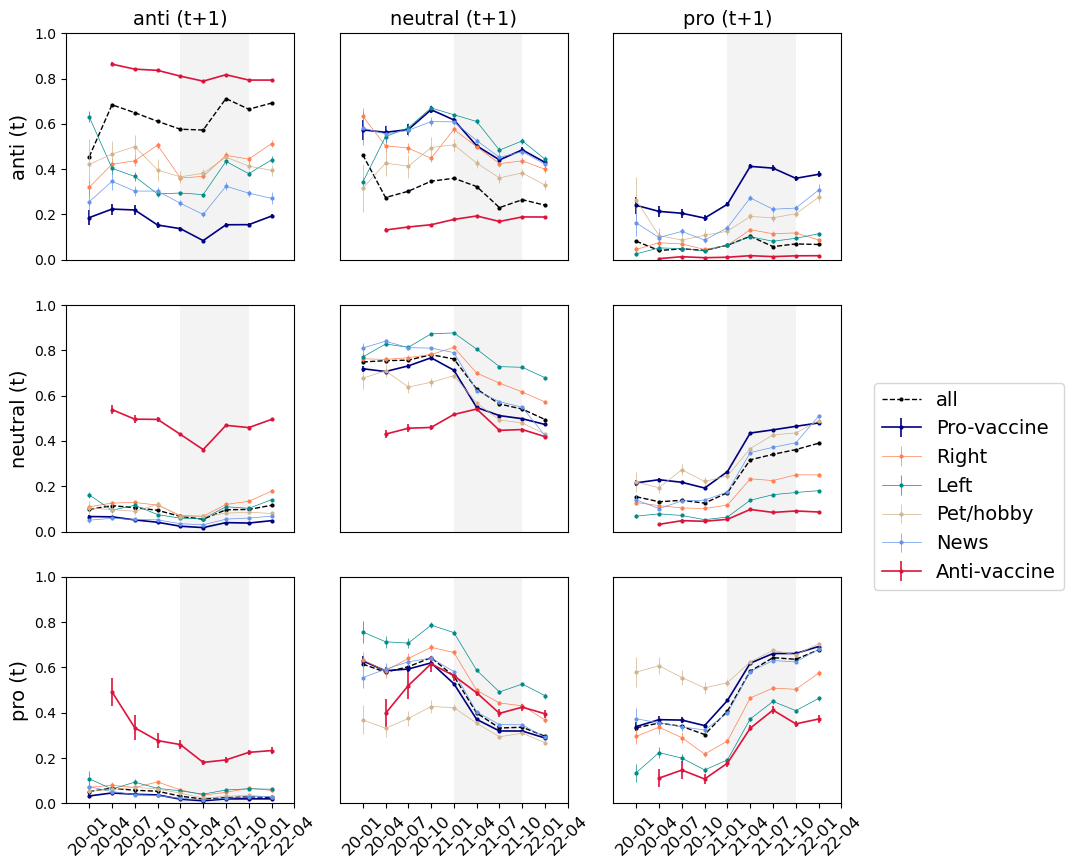

In [94]:

i=1
date_lst=list()
d1=datetime(2020,i,1)
y=2020
while d1<datetime(2022,4,1):
    d1=datetime(y,i,1)
    date_lst.append(d1.date())
    i+=3
    if i>12:
        y+=1
        i=i-12
date_lst=[datetime.strftime(t,"%Y")[-2:]+'-'+datetime.strftime(t,"%m") for t in date_lst]
        
fig=plt.figure(figsize=(10,10))
ind=1

colors=['lightgrey','navy','coral', 'darkcyan', 'tan', 'cornflowerblue', 'crimson']

for c1 in range(3):
    for c2 in range(3):
        ax=fig.add_subplot(3,3,ind)
        c=0
        x=result_com_op[op_classes[c1]+"-"+op_classes[c2]][c]['x']
        y=result_com_op[op_classes[c1]+"-"+op_classes[c2]][c]['y']
        std=result_com_op[op_classes[c1]+"-"+op_classes[c2]][c]['std']
        ax.plot(x,y,linewidth=1,color='black',linestyle='dashed',marker='o',markersize=2,label="all") #,color=colors[c]
        ax.set_ylim([0,1])
        ax.axvspan(5,8, color='lightgrey', alpha=0.25, lw=0)
            
        for c in classes.keys():

            x=result_com_op[op_classes[c1]+"-"+op_classes[c2]][c]['x']
            y=result_com_op[op_classes[c1]+"-"+op_classes[c2]][c]['y']
            std=result_com_op[op_classes[c1]+"-"+op_classes[c2]][c]['std']
            #ax.plot(x,y,linewidth=0.8,color=colors[c],marker='o',markersize=2,label=classes[c]) #,color=colors[c]
            if c==1 or c==6:
                linewidth=1.2
            else:
                linewidth=0.5
            ax.errorbar(x,y,yerr=std,linewidth=linewidth,color=colors[c],marker='o',markersize=2,label=classes[c]) #,color=colors[c]
            #ax.set_yscale('log')
            ax.set_xlim([0,10])
            #ax.set_ylim([10**(-3),10**0.3])
            ax.set_ylim([0,1])
        if c2!=0:
            ax.set_yticks([])
        else:
            ax.set_ylabel(op_classes[c1]+' (t)',fontsize=14)

        if c1==0:
            ax.set_title(op_classes[c2]+' (t+1)',fontsize=14)

        if c1==2:
            ax.set_xticks([1,2,3,4,5,6,7,8,9,10],date_lst,rotation=45,fontsize=12)
        else:
            ax.set_xticks([])
        ind+=1

plt.legend(bbox_to_anchor=[1.1,1.9],fontsize=14)

In [11]:
# degree>=100

user_degree_dy=pd.read_csv(r"C:\Maggie\Research Progress\Vaccine_tweet\Sample_data\daily_90\uid_outdegree_quarterly.txt",delimiter=" ",index_col=0,header=None)
user_degree_dy=user_degree_dy.iloc[:-2,:]


op_classes={0:'anti',1:'neutral',2:'pro'}
classes={1:'Pro-vaccine',2:'Right',3:'Left',4:'Pet/hobby',5:'News',6:'Anti-vaccine', 0:'Others',-1:'N/A'}

result_com_op=dict()
thresh=0.4
            
for c1 in range(0,3):
    for c2 in range(0,3):
        result_com_op[op_classes[c1]+"-"+op_classes[c2]]=dict()
        for c in range(0,7):
            result_com_op[op_classes[c1]+"-"+op_classes[c2]][c]={'x':[],'y':[],'std':[]}
        

for i in range(1,10):
    print(i,'=======================')
    temp_df=opinion_df.loc[:,[str(i)+"_1",i+1]]
    temp_df.loc[:,'from']=com_df.loc[:,str(i)+"_1"]
    temp_df.loc[:,'to']=com_df.loc[:,i+1]
    temp_df.loc[:,'out_degree']=user_degree_dy.loc[:,i]
    
    #temp_df=temp_df.loc[(temp_df[i]!=9) & (temp_df[i+1]!=9) & (temp_df['from']>0),:]
    temp_df=temp_df.loc[(temp_df[str(i)+"_1"]!=9) & (temp_df[i+1]!=9) & (temp_df['from']>0) & (temp_df['out_degree']>=100),:]
    
    N=len(temp_df)
    #from opinion
    
    temp_df.loc[(temp_df[str(i)+"_1"]>=thresh),str(i)+"_1"]=[2]*len(temp_df.loc[(temp_df[str(i)+"_1"]>=thresh),:])
    temp_df.loc[(temp_df[str(i)+"_1"]<thresh)&(temp_df[str(i)+"_1"]>-thresh),str(i)+"_1"]=[1]*len(temp_df.loc[(temp_df[str(i)+"_1"]<thresh)&(temp_df[str(i)+"_1"]>-thresh),:])
    temp_df.loc[(temp_df[str(i)+"_1"]<=-thresh),str(i)+"_1"]=[0]*len(temp_df.loc[(temp_df[str(i)+"_1"]<=-thresh),:])
    
    #to opinion
    temp_df.loc[(temp_df[i+1]>=thresh),i+1]=[2]*len(temp_df.loc[(temp_df[i+1]>=thresh),:])
    temp_df.loc[(temp_df[i+1]<thresh)&(temp_df[i+1]>-thresh),i+1]=[1]*len(temp_df.loc[(temp_df[i+1]<thresh)&(temp_df[i+1]>-thresh),:])
    temp_df.loc[(temp_df[i+1]<=-thresh),i+1]=[0]*len(temp_df.loc[(temp_df[i+1]<=-thresh),:])
    
    c=0
    temp_df1=temp_df.loc[(temp_df[str(i)+"_1"]==c1)]
    NN=len(temp_df1)        
    
    for c1 in range(3):
        temp_df1=temp_df.loc[(temp_df[str(i)+"_1"]==c1)]
        NN=len(temp_df1)
        print(c,c1,NN)
        yy=[(y[0],y[1]) for y in np.asarray(temp_df1.loc[:,[str(i)+"_1",i+1]])]
        yy=collections.Counter(yy)

        for c2 in range(3):
            a=yy[(c1,c2)]
            if NN!=0 :
                #print('               ,cond_pro=',round(a/NN,2))
                result_com_op[op_classes[c1]+"-"+op_classes[c2]][c]['x'].append(i)
                result_com_op[op_classes[c1]+"-"+op_classes[c2]][c]['y'].append(round(a/NN,5)) 
                result_com_op[op_classes[c1]+"-"+op_classes[c2]][c]['std'].append(round(np.sqrt(((a/NN)*(1-a/NN))/NN),5)) 
    
    
    #print(yy)
    for c in classes.keys():
        for c1 in range(3):
            temp_df1=temp_df.loc[(temp_df[str(i)+"_1"]==c1) & (temp_df['from']==c)]
            NN=len(temp_df1)
            print(c,c1,NN)
            yy=[(y[0],y[1]) for y in np.asarray(temp_df1.loc[:,[str(i)+"_1",i+1]])]
            yy=collections.Counter(yy)
    
            for c2 in range(3):
                a=yy[(c1,c2)]
                if NN!=0 :
                    if a>10:
                        #print('               ,cond_pro=',round(a/NN,2))
                        result_com_op[op_classes[c1]+"-"+op_classes[c2]][c]['x'].append(i)
                        result_com_op[op_classes[c1]+"-"+op_classes[c2]][c]['y'].append(round(a/NN,5)) 
                        result_com_op[op_classes[c1]+"-"+op_classes[c2]][c]['std'].append(round(np.sqrt(((a/NN)*(1-a/NN))/NN),5)) 
                #print('-------')
result_com_op

C:\Users\maggie\AppData\Local\Temp\ipykernel_9948\2860050164.py:3: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  user_degree_dy=pd.read_csv(r"C:\Maggie\Research Progress\Vaccine_tweet\Sample_data\daily_90\uid_outdegree_quarterly.txt",delimiter=" ",index_col=0,header=None)


1 =======================
0 0 578
0 1 1519
0 2 237
1 0 51
1 1 678
1 2 150
2 0 88
2 1 259
2 2 29
3 0 425
3 1 506
3 2 37
4 0 8
4 1 26
4 2 18
5 0 6
5 1 50
5 2 3
6 0 0
6 1 0
6 2 0
2 =======================
0 0 73
0 1 304
0 2 41
1 0 9
1 1 134
1 2 25
2 0 7
2 1 43
2 2 1
3 0 8
3 1 61
3 2 4
4 0 5
4 1 3
4 2 3
5 0 1
5 1 59
5 2 8
6 0 43
6 1 4
6 2 0
3 =======================
0 0 229
0 1 548
0 2 48
1 0 15
1 1 196
1 2 30
2 0 11
2 1 58
2 2 1
3 0 13
3 1 177
3 2 9
4 0 3
4 1 8
4 2 4
5 0 2
5 1 95
5 2 4
6 0 185
6 1 14
6 2 0
4 =======================
0 0 325
0 1 623
0 2 36
1 0 13
1 1 194
1 2 25
2 0 8
2 1 73
2 2 1
3 0 30
3 1 249
3 2 5
4 0 3
4 1 4
4 2 1
5 0 1
5 1 70
5 2 3
6 0 270
6 1 33
6 2 1
5 =======================
0 0 320
0 1 756
0 2 41
1 0 11
1 1 260
1 2 31
2 0 7
2 1 72
2 2 3
3 0 24
3 1 269
3 2 1
4 0 5
4 1 8
4 2 3
5 0 3
5 1 106
5 2 3
6 0 270
6 1 41
6 2 0
6 =======================
0 0 669
0 1 2126
0 2 162
1 0 11
1 1 748
1 2 115
2 0 20
2 1 231
2 2 8
3 0 44
3 1 829
3 2 15
4 0 2
4 1 13
4 2 11
5 0 2
5 1 209
5

{'anti-anti': {0: {'x': [1, 2, 3, 4, 5, 6, 7, 8, 9],
   'y': [0.70069,
    0.63014,
    0.80786,
    0.82769,
    0.81563,
    0.83109,
    0.89424,
    0.82824,
    0.8695],
   'std': [0.01905,
    0.0565,
    0.02604,
    0.02095,
    0.02168,
    0.01449,
    0.00902,
    0.00866,
    0.00928]},
  1: {'x': [], 'y': [], 'std': []},
  2: {'x': [1, 8, 9],
   'y': [0.56818, 0.51613, 0.65517],
   'std': [0.0528, 0.08976, 0.08826]},
  3: {'x': [1, 7, 8, 9],
   'y': [0.80235, 0.51429, 0.31068, 0.31579],
   'std': [0.01932, 0.08448, 0.0456, 0.07541]},
  4: {'x': [], 'y': [], 'std': []},
  5: {'x': [], 'y': [], 'std': []},
  6: {'x': [2, 3, 4, 5, 6, 7, 8, 9],
   'y': [0.90698,
    0.94595,
    0.92963,
    0.92222,
    0.91186,
    0.92613,
    0.89803,
    0.90879],
   'std': [0.0443,
    0.01662,
    0.01557,
    0.0163,
    0.01167,
    0.00795,
    0.00739,
    0.00825]}},
 'anti-neutral': {0: {'x': [1, 2, 3, 4, 5, 6, 7, 8, 9],
   'y': [0.2699,
    0.34247,
    0.18341,
    0.15692,
    

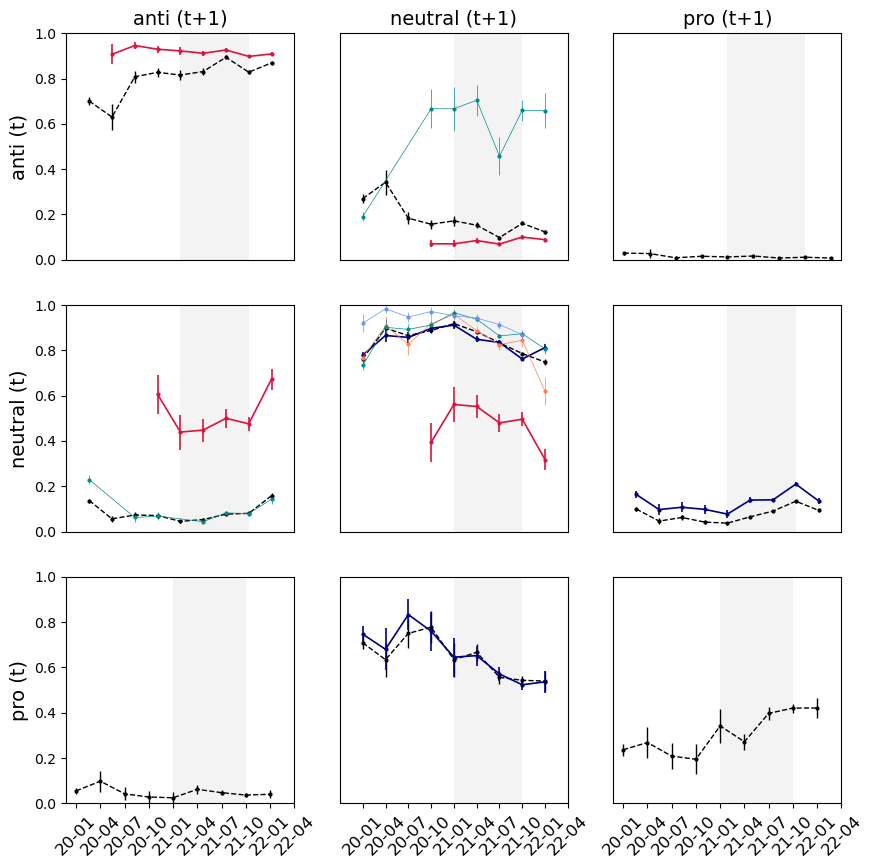

In [12]:

i=1
date_lst=list()
d1=datetime(2020,i,1)
y=2020
while d1<datetime(2022,4,1):
    d1=datetime(y,i,1)
    date_lst.append(d1.date())
    i+=3
    if i>12:
        y+=1
        i=i-12
date_lst=[datetime.strftime(t,"%Y")[-2:]+'-'+datetime.strftime(t,"%m") for t in date_lst]
        
        
fig=plt.figure(figsize=(10,10))
ind=1

colors=['lightgrey','navy','coral', 'darkcyan', 'tan', 'cornflowerblue', 'crimson']

for c1 in range(3):
    for c2 in range(3):
        ax=fig.add_subplot(3,3,ind)
        c=0
        x=result_com_op[op_classes[c1]+"-"+op_classes[c2]][c]['x']
        y=result_com_op[op_classes[c1]+"-"+op_classes[c2]][c]['y']
        std=result_com_op[op_classes[c1]+"-"+op_classes[c2]][c]['std']
        
        ax.errorbar(x,y,yerr=std,linewidth=1,color='black',linestyle='dashed',marker='o',markersize=2,label="all") #,color=colors[c]
        ax.set_ylim([0,1])
        ax.axvspan(5,8, color='lightgrey', alpha=0.25, lw=0)
            
        for c in classes.keys():

            x=result_com_op[op_classes[c1]+"-"+op_classes[c2]][c]['x']
            y=result_com_op[op_classes[c1]+"-"+op_classes[c2]][c]['y']
            std=result_com_op[op_classes[c1]+"-"+op_classes[c2]][c]['std']
            if len(x)<6:
                continue
            #ax.plot(x,y,linewidth=0.8,color=colors[c],marker='o',markersize=2,label=classes[c]) #,color=colors[c]
            if c==1 or c==6:
                linewidth=1.2
            else:
                linewidth=0.5
            ax.errorbar(x,y,yerr=std,linewidth=linewidth,color=colors[c],marker='o',markersize=2,label=classes[c]) #,color=colors[c]
            #ax.set_yscale('log')
            ax.set_xlim([0,10])
            #ax.set_ylim([10**(-3),10**0.3])
            ax.set_ylim([0,1])

        if c2!=0:
            ax.set_yticks([])
        else:
            ax.set_ylabel(op_classes[c1]+' (t)',fontsize=14)

        if c1==0:
            ax.set_title(op_classes[c2]+' (t+1)',fontsize=14)

        if c1==2:
            ax.set_xticks([1,2,3,4,5,6,7,8,9,10],date_lst,rotation=45,fontsize=12)
        else:
            ax.set_xticks([])
        ind+=1
#plt.legend(bbox_to_anchor=[1.1,1.1])

### Keywords by community

In [13]:
com_dict={25931:'pro-vac',26400:'news',3974:'anti-vac',4972:'pet-hobby',32763:'left',22613:'right'}
for c in com_dict.keys():
    print(c,com_dict[c],'----------------------------------')
    word_cloud=pd.read_csv(r"C:\Maggie\Research Progress\Vaccine_tweet\Sample_data\Wordcloud_community\wordsfre_c"+str(c)+".txt",delimiter=" ",header= None)
    word_cloud.loc[:,'tf_idf']=np.asarray(word_cloud.loc[:,1])/(np.asarray(word_cloud.loc[:,2]))
    word_cloud.loc[:,'ratio']=np.asarray(word_cloud.loc[:,1])/sum(word_cloud.loc[:,1])
    word_cloud=word_cloud.loc[(word_cloud[2]>0) & (word_cloud['ratio']>0.0005)]
    word_cloud=word_cloud.sort_values("tf_idf",ascending=False)
    print(word_cloud.iloc[:20,:])
    #_influencer


25931 pro-vac ----------------------------------
       0       1        2    tf_idf     ratio
203    空  112484   133344  0.843563  0.000564
214   5G  108690   204683  0.531016  0.000545
148    枠  151946   287615  0.528297  0.000761
211   まあ  110168   257531  0.427785  0.000552
170  打てる  134906   320933  0.420356  0.000676
123    券  184043   462298  0.398105  0.000922
208   デマ  110645   282506  0.391655  0.000554
16    予約  933326  2388296  0.390792  0.004676
217   やつ  107606   279161  0.385462  0.000539
166   取れ  135823   370704  0.366392  0.000680
199  自治体  114680   317339  0.361380  0.000575
113   経過  200654   556741  0.360408  0.001005
238   とこ  100900   283341  0.356108  0.000506
76     話  286237   808137  0.354194  0.001434
98    あと  230463   653341  0.352745  0.001155
136   わけ  168685   478385  0.352613  0.000845
34    思う  502804  1437328  0.349819  0.002519
205   とき  112053   321051  0.349019  0.000561
99    会場  229226   658168  0.348279  0.001148
210   電話  110287   317411  0.34

C:\Users\maggie\AppData\Local\Temp\ipykernel_9948\3466820101.py:5: RuntimeWarning: divide by zero encountered in divide
  word_cloud.loc[:,'tf_idf']=np.asarray(word_cloud.loc[:,1])/(np.asarray(word_cloud.loc[:,2]))
C:\Users\maggie\AppData\Local\Temp\ipykernel_9948\3466820101.py:5: RuntimeWarning: divide by zero encountered in divide
  word_cloud.loc[:,'tf_idf']=np.asarray(word_cloud.loc[:,1])/(np.asarray(word_cloud.loc[:,2]))
C:\Users\maggie\AppData\Local\Temp\ipykernel_9948\3466820101.py:5: RuntimeWarning: divide by zero encountered in divide
  word_cloud.loc[:,'tf_idf']=np.asarray(word_cloud.loc[:,1])/(np.asarray(word_cloud.loc[:,2]))


           0       1       2    tf_idf     ratio
121       ウソ  127552  142350  0.896045  0.000931
135       削減  117000  146002  0.801359  0.000854
256       博士   71491   89595  0.797935  0.000522
206       破壊   83188  105092  0.791573  0.000607
162     スパイク   97623  123947  0.787619  0.000713
243       警告   73412  101343  0.724391  0.000536
124        毒  124592  176706  0.705081  0.000909
189      危険性   86724  124616  0.695930  0.000633
172      遺伝子   92983  141205  0.658497  0.000679
246       医学   72879  117830  0.618510  0.000532
222        脳   78204  128363  0.609241  0.000571
154      死亡者  105023  172920  0.607350  0.000767
140       推進  115020  196574  0.585123  0.000840
155        死  104889  180374  0.581508  0.000766
93        強制  155398  268103  0.579621  0.001134
195       目的   86070  151438  0.568351  0.000628
180      すべて   90145  160374  0.562092  0.000658
60      mRNA  219849  397275  0.553392  0.001605
158       認め  103217  189860  0.543648  0.000753
212  イベルメクチン   81423

C:\Users\maggie\AppData\Local\Temp\ipykernel_9948\3466820101.py:5: RuntimeWarning: divide by zero encountered in divide
  word_cloud.loc[:,'tf_idf']=np.asarray(word_cloud.loc[:,1])/(np.asarray(word_cloud.loc[:,2]))
C:\Users\maggie\AppData\Local\Temp\ipykernel_9948\3466820101.py:5: RuntimeWarning: divide by zero encountered in divide
  word_cloud.loc[:,'tf_idf']=np.asarray(word_cloud.loc[:,1])/(np.asarray(word_cloud.loc[:,2]))
C:\Users\maggie\AppData\Local\Temp\ipykernel_9948\3466820101.py:5: RuntimeWarning: divide by zero encountered in divide
  word_cloud.loc[:,'tf_idf']=np.asarray(word_cloud.loc[:,1])/(np.asarray(word_cloud.loc[:,2]))


### Appendix: Preferential attachment and homophily

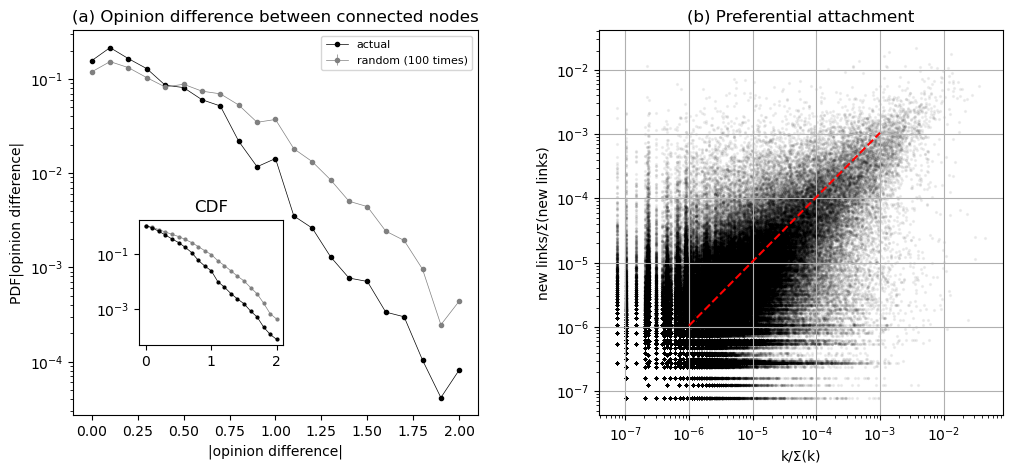

In [14]:
fig=plt.figure(figsize=(12,5))
fig.subplots_adjust(wspace=0.3)

# preferential attachement

ax=fig.add_subplot(1,2,2)
newlink_degree=pd.read_csv(r"C:\Maggie\Research Progress\Vaccine_tweet\Sample_data\daily_90\summary_newlink_degree.txt",delimiter=" ",header=None)
newlink_degree

temp=newlink_degree.loc[ (newlink_degree[2]>0)] #(newlink_degree[0]=="2020-04-01") &

plt.scatter(temp.loc[:,4],temp.loc[:,3],s=2,alpha=0.05,color='black')
plt.yscale('log')
plt.xscale('log')

plt.xlabel('k/Σ(k)')
plt.ylabel('new links/Σ(new links)')

x=[[np.log10(x)] for x in list(temp.loc[:,4])]
y=[[np.log10(y)] for y in list(temp.loc[:,3])]

coef=1
intercept=0.02
plt.plot([10**(-6),10**(-3)],[10**(coef*(-6)+intercept),10**(coef*(-3)+intercept)],color="red",linestyle='dashed')
plt.grid()
ax.set_title("(b) Preferential attachment")


# Homophily: actual vs randomly shuffled x 100 times (weighted) 


ax=fig.add_subplot(1,2,1)

i=1
date_lst=list()
d1=datetime(2020,i,1)
result_df_all=pd.DataFrame(index=np.round(np.arange(0,2.1,0.1),1),columns=list(range(100)))
result_df_all=result_df_all.fillna(0)

y=2020

#shuffled
while d1<datetime(2022,3,1):
    d1=datetime(y,i,1)
    date_lst.append(d1.date())
    i+=3
    if i>12:
        y+=1
        i=3
    d1_0=datetime.strftime(d1,"%Y-%m-%d")
    op_dif=pd.read_csv(r"C:\Maggie\Research Progress\Vaccine_tweet\Sample_data\daily_90\link_opinion_dff\opnion_dif_"+d1_0+"_shuf.csv",delimiter=" ",header=None,index_col=0)
    op_dif=op_dif.sort_index()
    result_df_all.loc[:,:]=np.asarray(result_df_all.loc[:,:])+np.asarray(op_dif.iloc[:,:100])

avg_lst=np.average(result_df_all.iloc[:,:]/np.sum(result_df_all.iloc[:,:],axis=0),axis=1)
std_lst=np.std(result_df_all.iloc[:,:]/np.sum(result_df_all.iloc[:,:],axis=0),axis=1)
plt.errorbar(list(op_dif.index)[:],avg_lst,yerr=std_lst,linewidth=0.5,label='random (100 times)',color='grey',marker='o',markersize=3)


i=1
date_lst=list()
d1=datetime(2020,i,1)
result_df0=pd.DataFrame()
while d1<datetime(2022,3,1):
    d1=datetime(y,i,1)
    date_lst.append(d1.date())
    i+=3
    if i>12:
        y+=1
        i=3
    d1_0=datetime.strftime(d1,"%Y-%m-%d")
    op_dif=pd.read_csv(r"C:\Maggie\Research Progress\Vaccine_tweet\Sample_data\daily_90\link_opinion_dff\opnion_dif_"+d1_0+".csv",delimiter=" ",header=None,index_col=0)
    for j in op_dif.index:
        result_df0.loc[j,d1_0]=np.round(op_dif.loc[j,1],1)
result_df0=result_df0.sort_index()
result_df0.loc[:,'total']=np.sum(np.asarray(result_df0.iloc[:,:-1]),axis=1)
result_df0

x=list(result_df0.index)
y=list(result_df0.loc[:,'total'])
y=[y[i]/sum(y) for i in range(len(y))]
#y=[sum(y[i:])/sum(y) for i in range(len(y))]
plt.plot(x,y,linewidth=0.5,label="actual",marker='o',markersize=3,color='black')
plt.yscale('log')
ax.set_title("(a) Opinion difference between connected nodes")

ax.set_xlabel('|opinion difference|')
ax.set_ylabel('PDF|opinion difference|')



plt.legend(fontsize=8)

left, bottom, width, height = [0.18, 0.25, 0.12, 0.25]
ax2 = fig.add_axes([left, bottom, width, height])
avg_lst=np.average(result_df_all.iloc[:,:],axis=1)
avg_lst=[np.sum(avg_lst[i:])/sum(avg_lst) for i in range(len(avg_lst))]
ax2.plot(x,avg_lst,linewidth=0.5,label='random',color='grey',marker='o',markersize=2)

x=list(result_df0.index)
y=list(result_df0.loc[:,'total'])
y=[sum(y[i:])/sum(y) for i in range(len(y))]

ax2.plot(x,y,linewidth=0.5,label="actual",marker='o',markersize=2,color='black')
ax2.set_title('CDF')
plt.yscale('log')


### Appendix: Opinion similarity by out-degree, activity:

### Group homophily - 3 phases

phase 1


C:\Users\maggie\AppData\Local\Temp\ipykernel_9948\2808405573.py:35: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  user_df.loc[:,"community"]=com_class0.loc[:,1]
C:\Users\maggie\AppData\Local\Temp\ipykernel_9948\2808405573.py:36: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  user_df.loc[:,"class0"]=com_class0.loc[:,2]
C:\Users\maggie\AppData\Local\Temp\ipykernel_9948\2808405573.py:37: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the 

Get vaccine opinion profile per com
threshold= 1
------------------------------
phase 2


C:\Users\maggie\AppData\Local\Temp\ipykernel_9948\2808405573.py:35: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  user_df.loc[:,"community"]=com_class0.loc[:,1]
C:\Users\maggie\AppData\Local\Temp\ipykernel_9948\2808405573.py:36: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  user_df.loc[:,"class0"]=com_class0.loc[:,2]
C:\Users\maggie\AppData\Local\Temp\ipykernel_9948\2808405573.py:37: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the 

Get vaccine opinion profile per com
threshold= 1
------------------------------
phase 3


C:\Users\maggie\AppData\Local\Temp\ipykernel_9948\2808405573.py:35: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  user_df.loc[:,"community"]=com_class0.loc[:,1]
C:\Users\maggie\AppData\Local\Temp\ipykernel_9948\2808405573.py:36: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  user_df.loc[:,"class0"]=com_class0.loc[:,2]
C:\Users\maggie\AppData\Local\Temp\ipykernel_9948\2808405573.py:37: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the 

Get vaccine opinion profile per com
threshold= 1
------------------------------


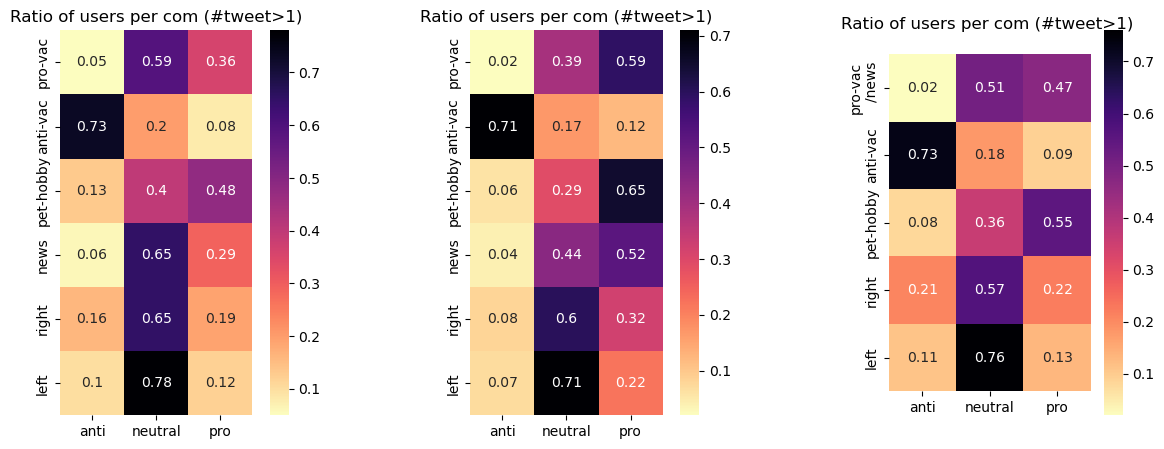

In [15]:
class_dict={0:'anti',1:'neutral',2:'pro'}

dates=['2020-01-01','2021-04-01','2021-12-01']

#load data

fig=plt.figure(figsize=(15,5))
    


for dd in [1,2,3]:
    if dd==1:
        com_class0=pd.read_csv(r"C:\Maggie\Research Progress\Vaccine_tweet\Sample_data\3_phases\p1\u_com_class_r1.0_2020-01-01.csv",delimiter=" ",header=None,index_col=0)
        user_in_out0=pd.read_csv(r"C:\Maggie\Research Progress\Vaccine_tweet\Sample_data\3_phases\p1\in_outdegree_2020-01-01.csv",delimiter=" ",header=None,index_col=0)
        user_com=pd.read_csv(r"C:\Maggie\Research Progress\Vaccine_tweet\Sample_data\3_phases\user_com2.txt",index_col=0)
        com_size=pd.read_csv(r'C:\Maggie\Research Progress\Vaccine_tweet\Sample_data\3_phases\p1\comsize_2020-01-01_r1.0.csv',delimiter=" ",index_col=0,header=None)
    elif dd==2:
        com_class0=pd.read_csv(r"C:\Maggie\Research Progress\Vaccine_tweet\Sample_data\3_phases\p2\u_com_class_r1.0_2021-04-01.csv",delimiter=" ",header=None,index_col=0)
        user_in_out0=pd.read_csv(r"C:\Maggie\Research Progress\Vaccine_tweet\Sample_data\3_phases\p2\in_outdegree_2021-04-01.csv",delimiter=" ",header=None,index_col=0)
        user_com=pd.read_csv(r"C:\Maggie\Research Progress\Vaccine_tweet\Sample_data\3_phases\user_com2.txt",index_col=0)
        com_size=pd.read_csv(r'C:\Maggie\Research Progress\Vaccine_tweet\Sample_data\3_phases\p2\comsize_2021-04-01_r1.0.csv',delimiter=" ",index_col=0,header=None)
    elif dd==3:
        com_class0=pd.read_csv(r"C:\Maggie\Research Progress\Vaccine_tweet\Sample_data\3_phases\p3\u_com_class_r1.0_2021-12-01.csv",delimiter=" ",header=None,index_col=0)
        user_in_out0=pd.read_csv(r"C:\Maggie\Research Progress\Vaccine_tweet\Sample_data\3_phases\p3\in_outdegree_2021-12-01.csv",delimiter=" ",header=None,index_col=0)
        user_com=pd.read_csv(r"C:\Maggie\Research Progress\Vaccine_tweet\Sample_data\3_phases\user_com2.txt",index_col=0)
        com_size=pd.read_csv(r'C:\Maggie\Research Progress\Vaccine_tweet\Sample_data\3_phases\p3\comsize_2021-12-01_r1.0.csv',delimiter=" ",index_col=0,header=None)
    
    print('phase',dd)
    
    com_class=com_class0.copy()
    com_class.loc[:,'total']=np.sum(np.asarray(com_class.iloc[:,1:4]),axis=1)
    com_class.loc[:,'user_fcom']=com_class.loc[:,5]

    user_df=pd.DataFrame(index=list(user_in_out0.index),columns=['community','class0','class1','class2','in_degree','out_degree'])
    user_df.loc[:,"community"]=com_class0.loc[:,1]
    user_df.loc[:,"class0"]=com_class0.loc[:,2]
    user_df.loc[:,"class1"]=com_class0.loc[:,3]
    user_df.loc[:,"class2"]=com_class0.loc[:,4]
    user_df.loc[:,"in_degree"]=user_in_out0.loc[:,2]
    user_df.loc[:,"out_degree"]=user_in_out0.loc[:,3]
    user_df

    for u in user_com.index:
        try:
            user_com.loc[u,"new_com"]=user_df.loc[u,'community']
        except:
            user_com.loc[u,"new_com"]=""


    com_df=pd.DataFrame(index=['pro-vac','anti-vac','pet-hobby','news',  'right',  'left'],columns=list(set(list(user_com.loc[:,"new_com"]))))
    com_df=com_df.fillna(0)

    for u in user_com.index:
        if user_com.loc[u,"community2"] in ['pro-vac','anti-vac','pet-hobby','news',  'right',  'left']:
            com_df.loc[user_com.loc[u,"community2"],user_com.loc[u,"new_com"]]+=1

    com_df=com_df.iloc[:,1:]
    #print(com_df)


    com_df.iloc[:,:]=np.round(np.asarray(com_df.iloc[:,:])/np.reshape(np.sum(np.asarray(com_df.iloc[:,:]),axis=1),(6,1)),1)
    #print(com_df)


    matching_com=dict()
    for c in com_df.index:
        matching_com[list(com_df.columns)[list(com_df.loc[c,:]).index(max(list(com_df.loc[c,:])))]]=c
        #print('------------------------------------')
        #print(c)
        #print("community size ratio: ",com_size.loc[list(com_df.columns)[list(com_df.loc[c,:]).index(max(list(com_df.loc[c,:])))],2])
        #print("community code: ",str(list(com_df.columns)[list(com_df.loc[c,:]).index(max(list(com_df.loc[c,:])))]))
        #print("Probability of matching", list(com_df.loc[c,:])[list(com_df.loc[c,:]).index(max(list(com_df.loc[c,:])))])



    com_class=com_class.fillna(0)

    # Get vaccine opinion profile per com
    print("Get vaccine opinion profile per com")
    com_class_mat=pd.DataFrame()

    fig.subplots_adjust(hspace=0.8)
    ind=1
    for threshold in [1]:
        print("threshold=",threshold)
        for c in matching_com.keys():
            for c2 in class_dict.keys():
                com_class_mat.loc[matching_com[c],class_dict[c2]]=len(com_class.loc[(com_class["total"]>threshold) & (com_class[1]==c) & (com_class[5]==c2)])

        #print(com_class_mat)
        if dd<=2:
            ax=fig.add_subplot(1,3,dd)
            ax.set_title('Ratio of users per com (#tweet>'+str(threshold)+')')
            matrix_df2=np.asarray(com_class_mat.iloc[:,:])/np.reshape(np.sum(np.asarray(com_class_mat.iloc[:,:]),axis=1),(len(matching_com.items()),1))
            sns.heatmap(np.round(matrix_df2,2),square=True,xticklabels=class_dict.values(),yticklabels=matching_com.values(),annot=True,cmap='magma_r')

        else:
            ax=fig.add_subplot(1,4,dd+1)
            ax.set_title('Ratio of users per com (#tweet>'+str(threshold)+') \n')
            matrix_df2=np.asarray(com_class_mat.iloc[:,:])/np.reshape(np.sum(np.asarray(com_class_mat.iloc[:,:]),axis=1),(len(matching_com.items()),1))
            sns.heatmap(np.round(matrix_df2,2),square=True,xticklabels=class_dict.values(),yticklabels=['pro-vac\n/news','anti-vac','pet-hobby','right','left'],annot=True,cmap='magma_r')

        
        print('------------------------------')
        
    print('==================================================')
    print('==================================================')
    